# **Thank You for opening this notebook!!!**
## **If you find this notebook useful then please upvote.**

# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
1. [Step 0: Imports and Reading data](#1)
2. [Step 1: data Understanding](#2)
3. [Step 2: data Prep](#3)
4. [Step 3: Feature Understanding](#4)
5. [Step 4: Feature Relationships](#5)
6. [Step 5: Analyse Hypothese](#6)
7. [Step 6: data Cleaning](#7)
8. [Step 7: Model Building (If Applicable):](#8)
9. [Step 8: Model Evaluation:](#9)
10. [Step 9: Make Pipline:](#10)
11. [Step 10: Feature Engineering:](#11)
12. [Step 11: Feature Scalling:](#12)

# [Step 0: Imports and Reading data]()<a id="1"></a> <br>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
plt.style.use('ggplot')

df = pd.read_csv('D:\Paractical data scientist\Supermarket Dataset\\supermarket_sales - Sheet1.csv')
df = df.copy()

# [Step 1: data Understanding]()<a id="2"></a> <br>
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns : (150, 5)

In [90]:
df.drop_duplicates(inplace = True)
df.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [91]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

<Axes: ylabel='proportion'>

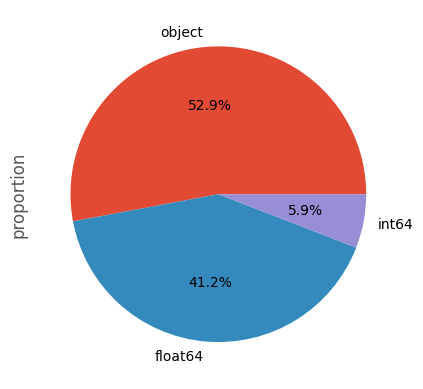

In [92]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# [Step 2: data Preperation]()<a id="3"></a> <br>
- Dropping irrelevant columns and rows

In [93]:
df = df.drop(['Invoice ID'], axis = 1)

In [94]:
for col in df.columns:
    if len(df[col].unique()) == 1 :
        print("we drop "+col+" : Observing Unique Values")
        df.drop([col], axis=1, inplace=True)

we drop gross margin percentage : Observing Unique Values


- - Cleaning Column (always use it  for column_y)

In [95]:
for col in df.select_dtypes(exclude=['float','int']):
    if len(df[col].unique()) <= 20 :
        print(f'{col :-<40} {df[col].unique()}')

Branch---------------------------------- ['A' 'C' 'B']
City------------------------------------ ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type--------------------------- ['Member' 'Normal']
Gender---------------------------------- ['Female' 'Male']
Product line---------------------------- ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment--------------------------------- ['Ewallet' 'Cash' 'Credit card']


In [96]:
for col in df.select_dtypes(include=['float','int']):
    print(f'{col :-<40} {df[col].median()}')

Unit price------------------------------ 55.230000000000004
Quantity-------------------------------- 5.0
Tax 5%---------------------------------- 12.088000000000001
Total----------------------------------- 253.848
cogs------------------------------------ 241.76
gross income---------------------------- 12.088000000000001
Rating---------------------------------- 7.0


In [97]:
ds = df.copy()
ds['Date'] = pd.to_datetime(df['Date'])
for col in df.select_dtypes(include=['datetime64']):
    print(f'{col :-<40} {ds[col].median()}')

In [98]:
ds = df.copy()
time_columns = ['Time'] 
for col in time_columns:
    ds[col] = pd.to_datetime(df[col]).dt.hour
    print(f'{col :-<40} {ds[col].median()}')

Time------------------------------------ 15.0


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_12204\4146633982.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



- - visualisation val missing : (visualisation of array[True, False] in order to detect nan(% of emptying))

<Axes: >

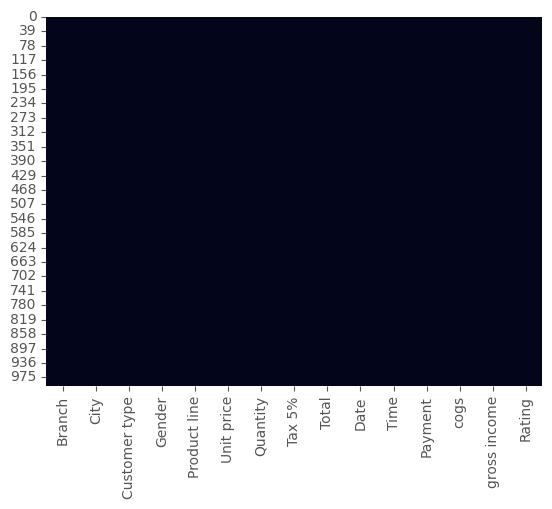

In [99]:
sns.heatmap(df.isna(), cbar=False) 

# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

Text(0.5, 0, 'Rating')

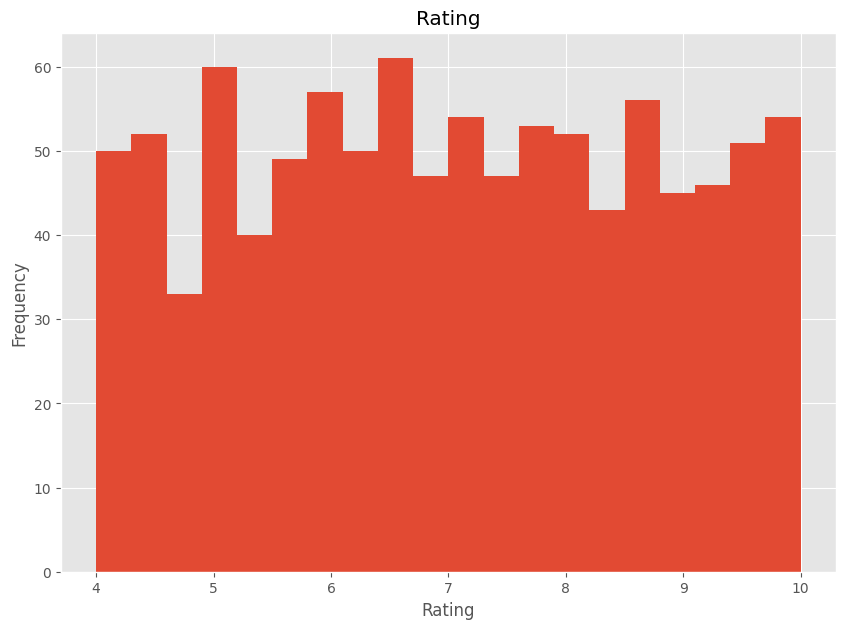

In [100]:
plt.figure(figsize=(10,7))
ax = df['Rating'].plot(kind='hist',bins=20,title='Rating')
ax.set_xlabel('Rating')

- - Histo des variables columns number : (distibution normale ou gausien symetrique or not) / uniforme / multi modale

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

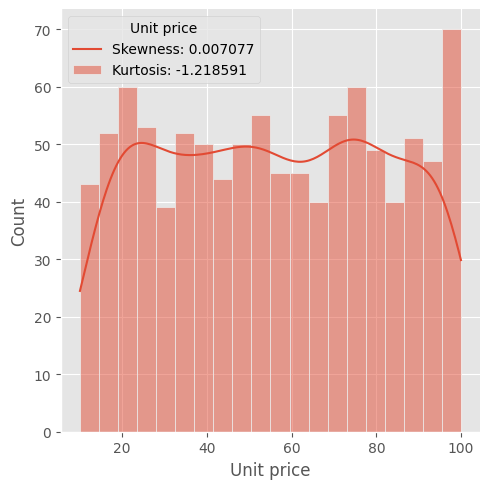

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

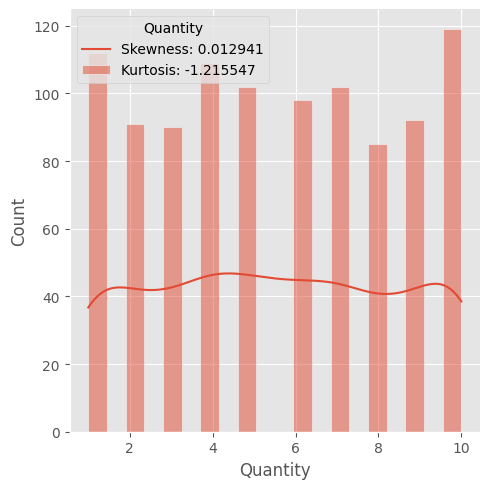

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

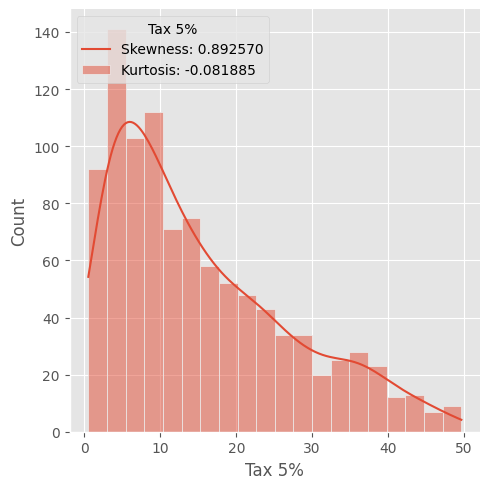

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

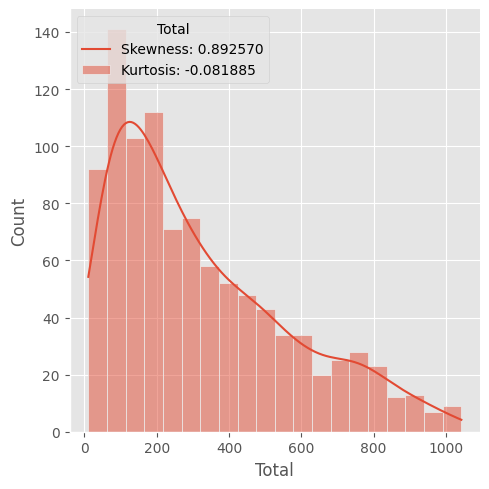

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

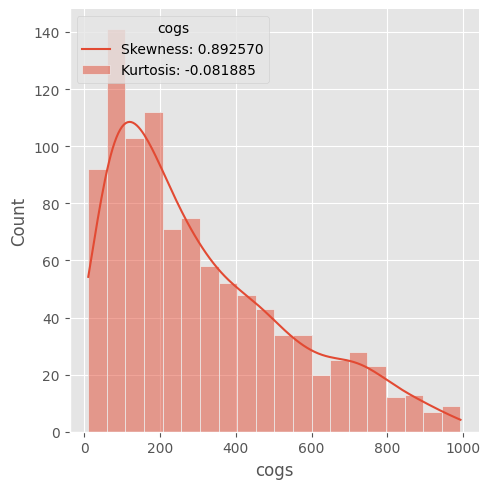

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

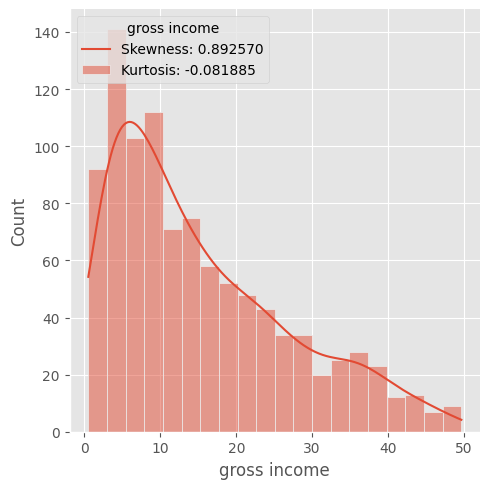

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

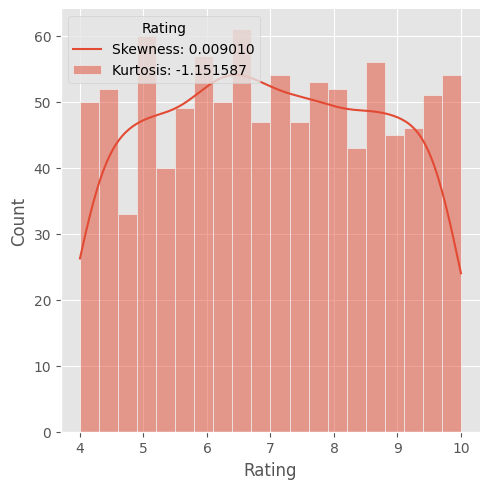

In [101]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title=col, loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

- - Histo des variables columns object : (binaire(0,1) or not) / (equilibre or not)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Branch-------------------------------------------- ['A' 'C' 'B']


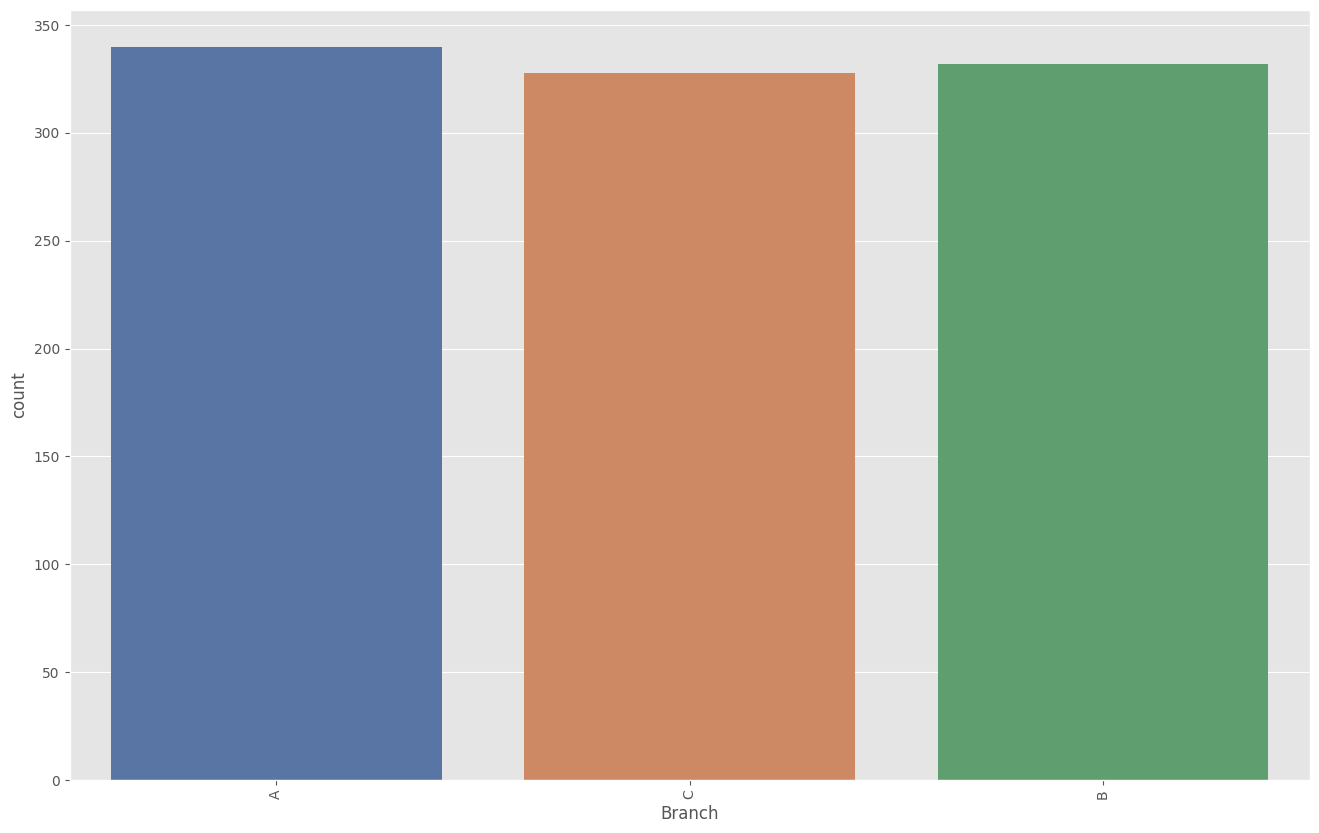

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


City---------------------------------------------- ['Yangon' 'Naypyitaw' 'Mandalay']


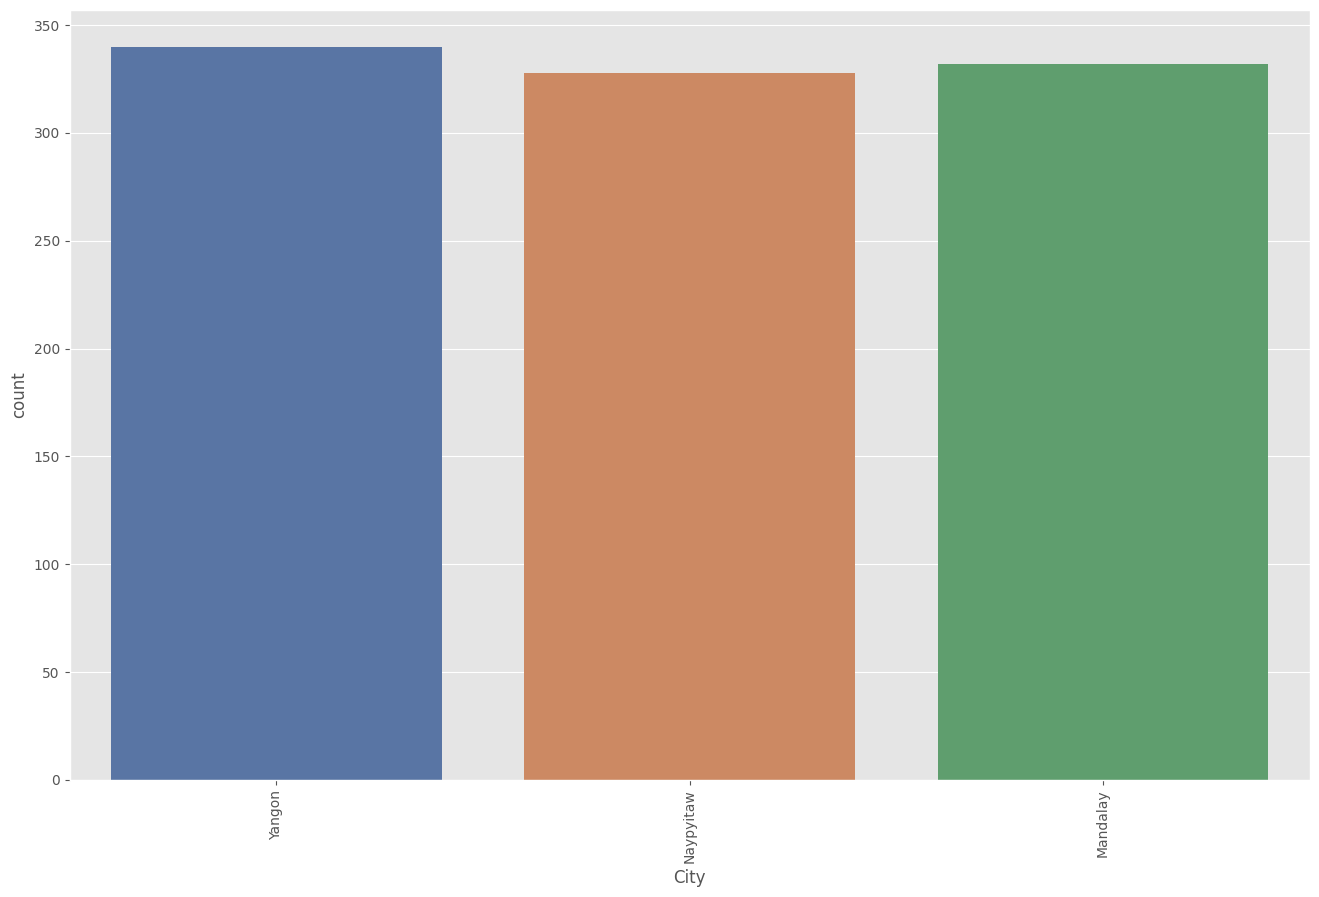

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Customer type------------------------------------- ['Member' 'Normal']


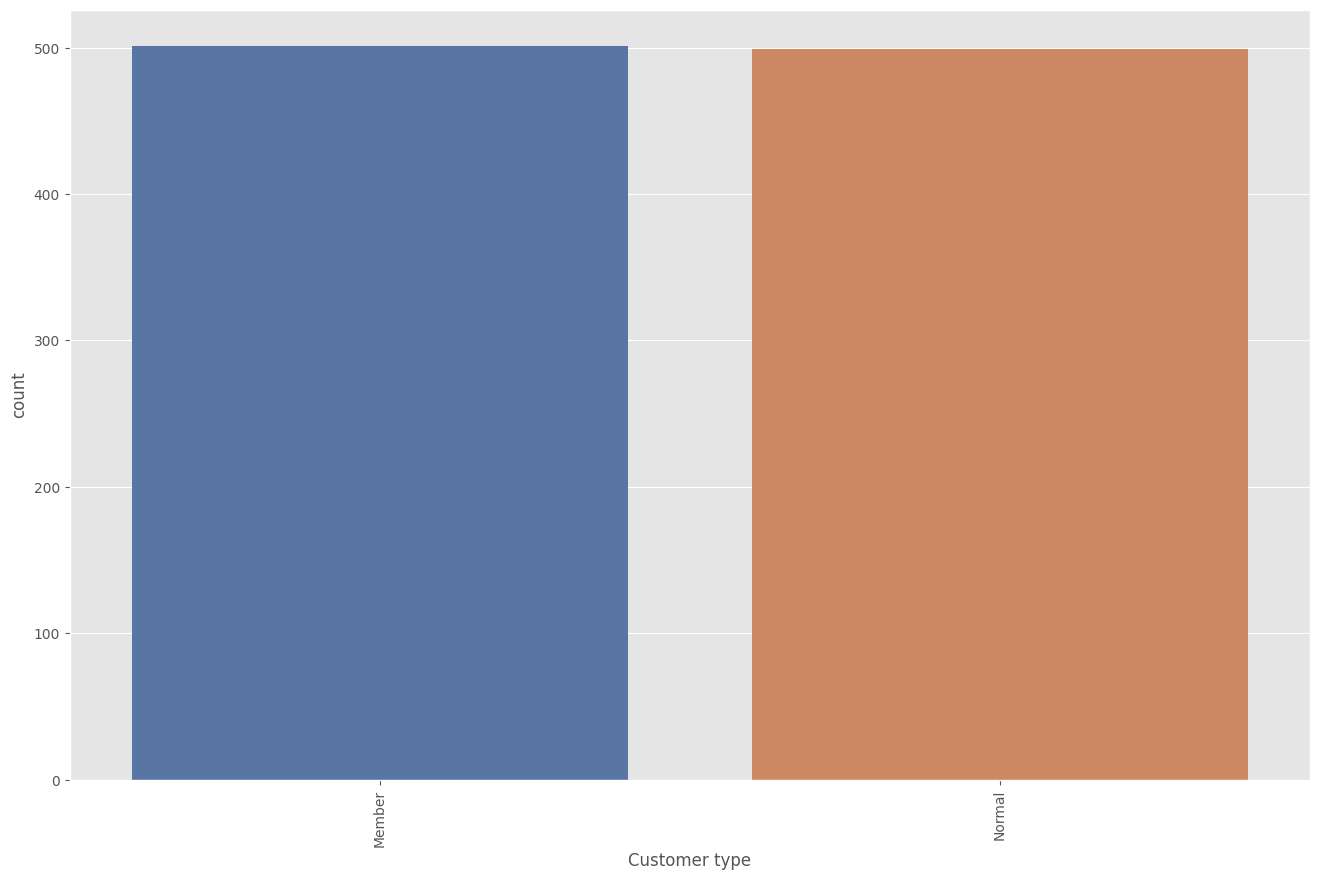

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Gender-------------------------------------------- ['Female' 'Male']


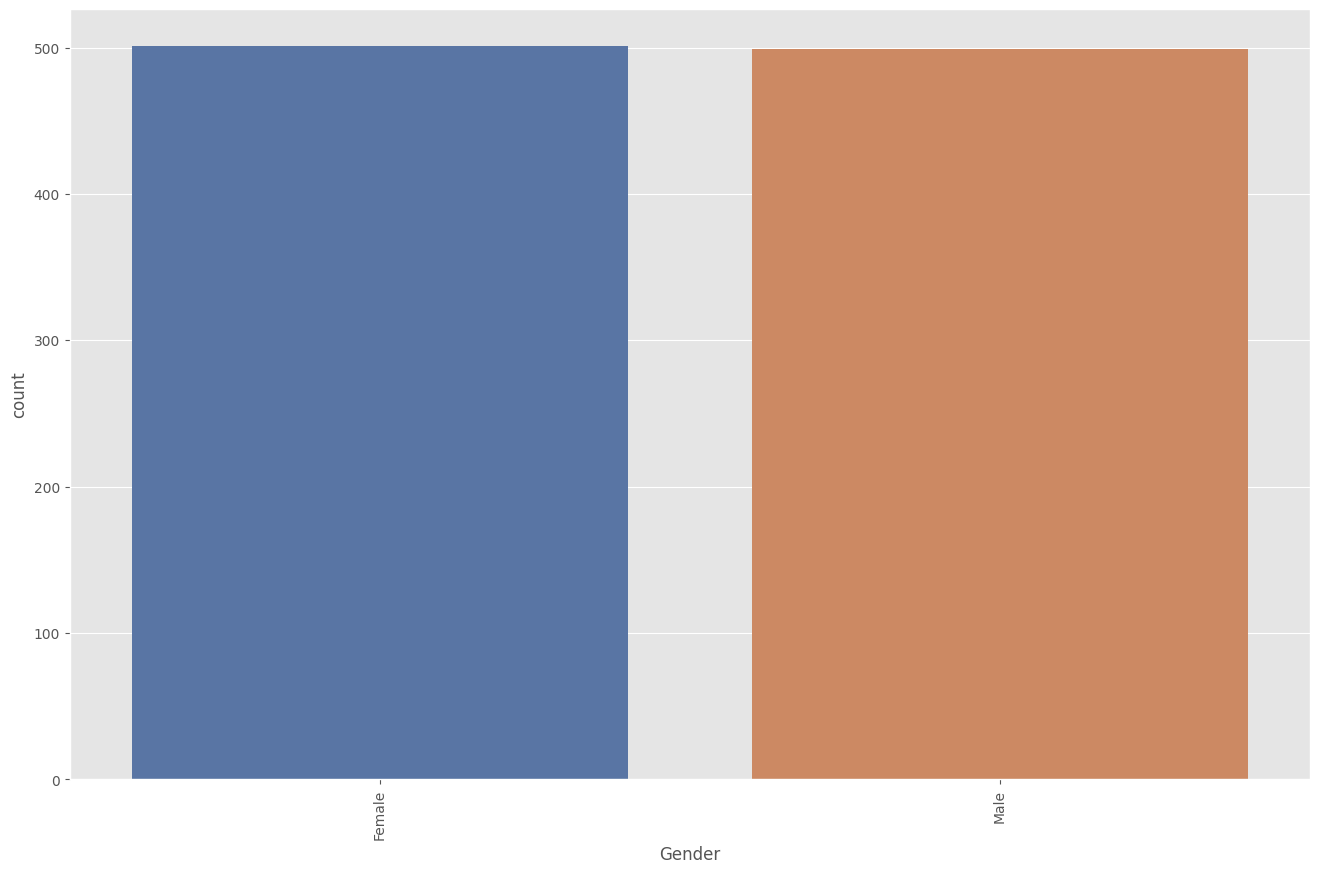

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Product line-------------------------------------- ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


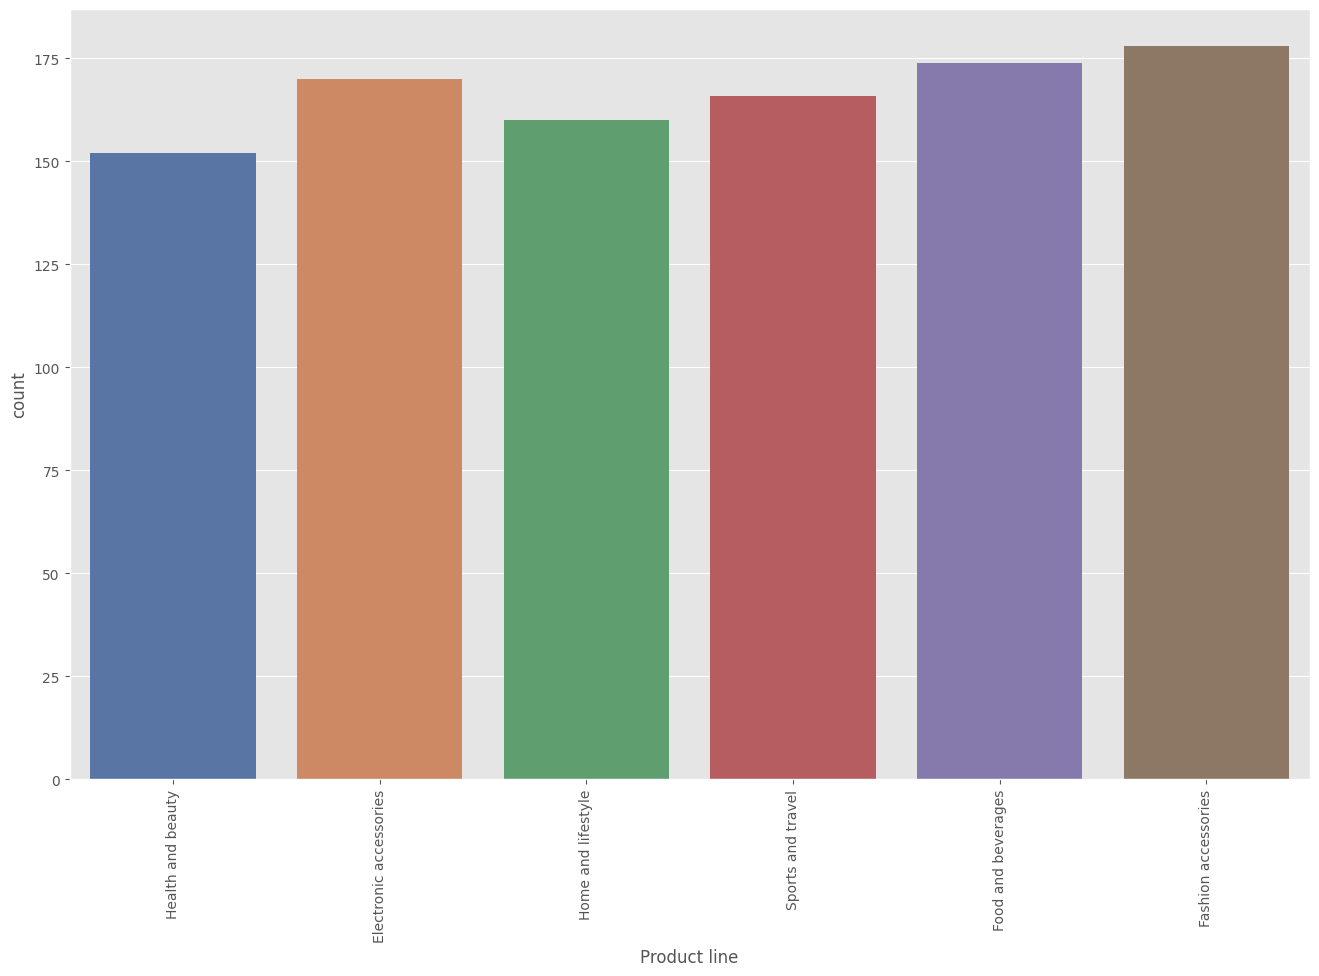

Date---------------------------------------------- ['1/5/2019' '3/8/2019' '3/3/2019' '1/27/2019' '2/8/2019' '3/25/2019'
 '2/25/2019' '2/24/2019' '1/10/2019' '2/20/2019' '2/6/2019' '3/9/2019'
 '2/12/2019' '2/7/2019' '3/29/2019' '1/15/2019' '3/11/2019' '1/1/2019'
 '1/21/2019' '3/5/2019' '3/15/2019' '2/17/2019' '3/2/2019' '3/22/2019'
 '3/10/2019' '1/25/2019' '1/28/2019' '1/7/2019' '3/23/2019' '1/17/2019'
 '2/2/2019' '3/4/2019' '3/16/2019' '2/27/2019' '2/10/2019' '3/19/2019'
 '2/3/2019' '3/7/2019' '2/28/2019' '3/27/2019' '1/20/2019' '3/12/2019'
 '2/15/2019' '3/6/2019' '2/14/2019' '3/13/2019' '1/24/2019' '1/6/2019'
 '2/11/2019' '1/22/2019' '1/13/2019' '1/9/2019' '1/12/2019' '1/26/2019'
 '1/23/2019' '2/23/2019' '1/2/2019' '2/9/2019' '3/26/2019' '3/1/2019'
 '2/1/2019' '3/28/2019' '3/24/2019' '2/5/2019' '1/19/2019' '1/16/2019'
 '1/8/2019' '2/18/2019' '1/18/2019' '2/16/2019' '2/22/2019' '1/29/2019'
 '1/4/2019' '3/30/2019' '1/30/2019' '1/3/2019' '3/21/2019' '2/13/2019'
 '1/14/2019' '3/18/2019' '

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


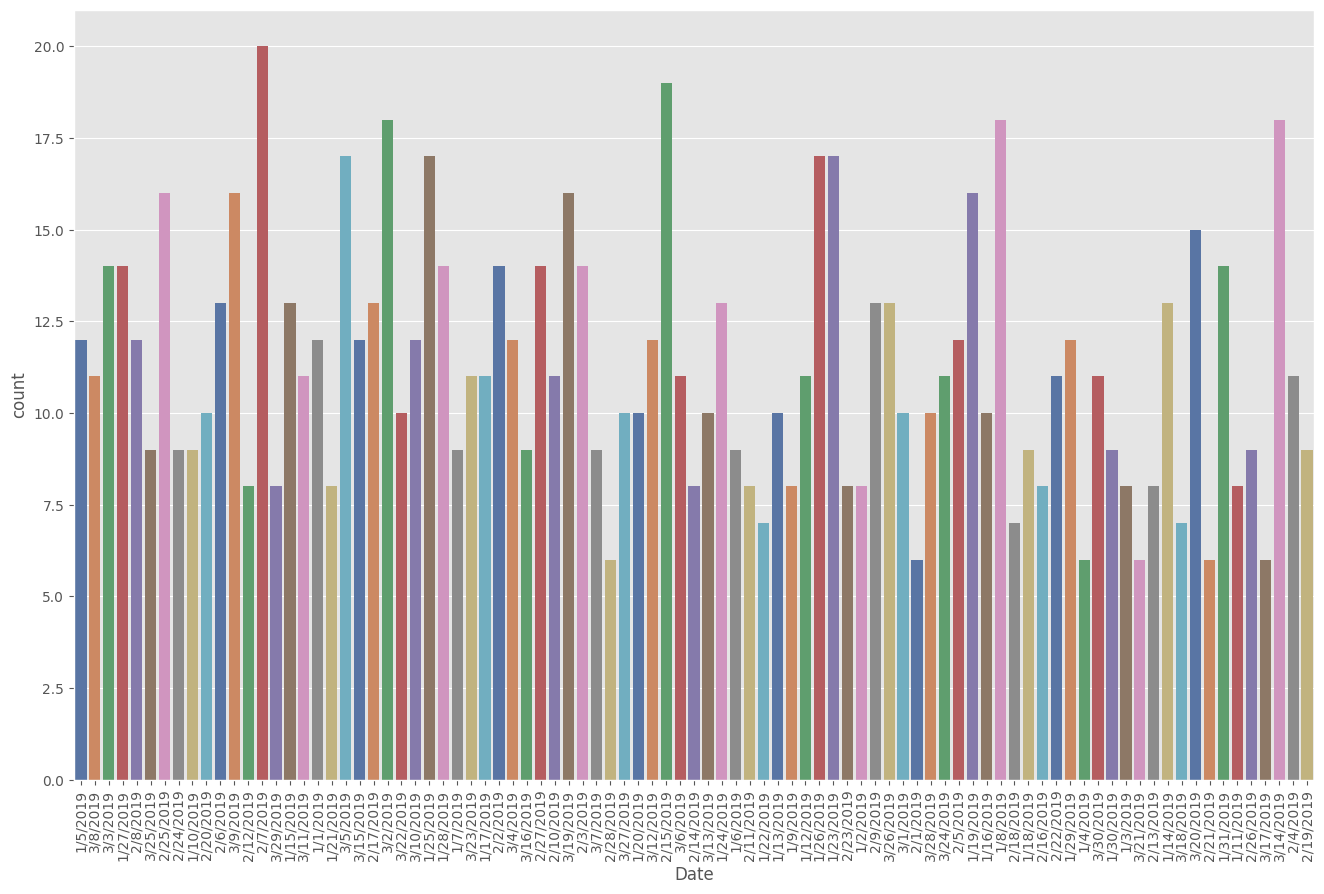

Time---------------------------------------------- ['13:08' '10:29' '13:23' '20:33' '10:37' '18:30' '14:36' '11:38' '17:15'
 '13:27' '18:07' '17:03' '10:25' '16:48' '19:21' '16:19' '11:03' '10:39'
 '18:00' '15:30' '11:24' '10:40' '12:20' '11:15' '17:36' '19:20' '15:31'
 '12:17' '19:48' '15:36' '19:39' '12:43' '14:49' '10:12' '10:42' '12:28'
 '19:15' '17:17' '13:24' '13:01' '18:45' '10:11' '13:03' '20:39' '19:47'
 '17:24' '15:47' '12:45' '17:08' '10:19' '15:10' '14:42' '15:46' '11:49'
 '19:01' '11:26' '11:28' '15:55' '20:36' '17:47' '10:55' '13:40' '12:27'
 '14:35' '16:40' '15:43' '15:01' '10:04' '18:50' '12:46' '18:17' '18:21'
 '17:04' '14:20' '15:48' '16:24' '18:56' '19:56' '18:37' '10:17' '14:31'
 '10:23' '20:35' '16:57' '17:55' '19:54' '16:42' '12:09' '20:05' '20:38'
 '13:11' '10:16' '18:14' '13:22' '11:27' '16:44' '18:19' '14:50' '20:54'
 '20:19' '10:43' '14:30' '11:32' '10:41' '12:44' '20:07' '20:31' '12:29'
 '15:26' '20:48' '12:02' '17:26' '19:52' '14:57' '18:44' '13:26' '16:17'


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


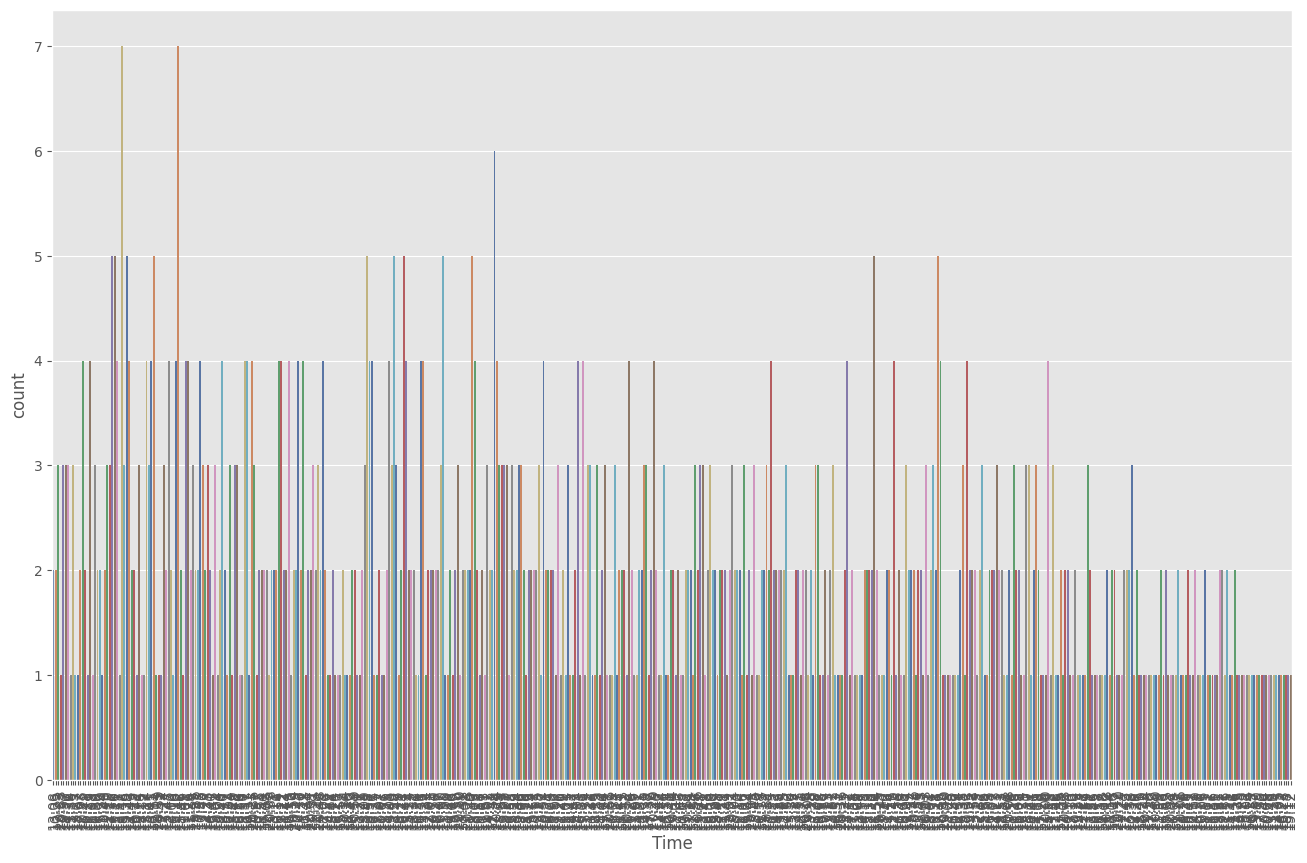

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Payment------------------------------------------- ['Ewallet' 'Cash' 'Credit card']


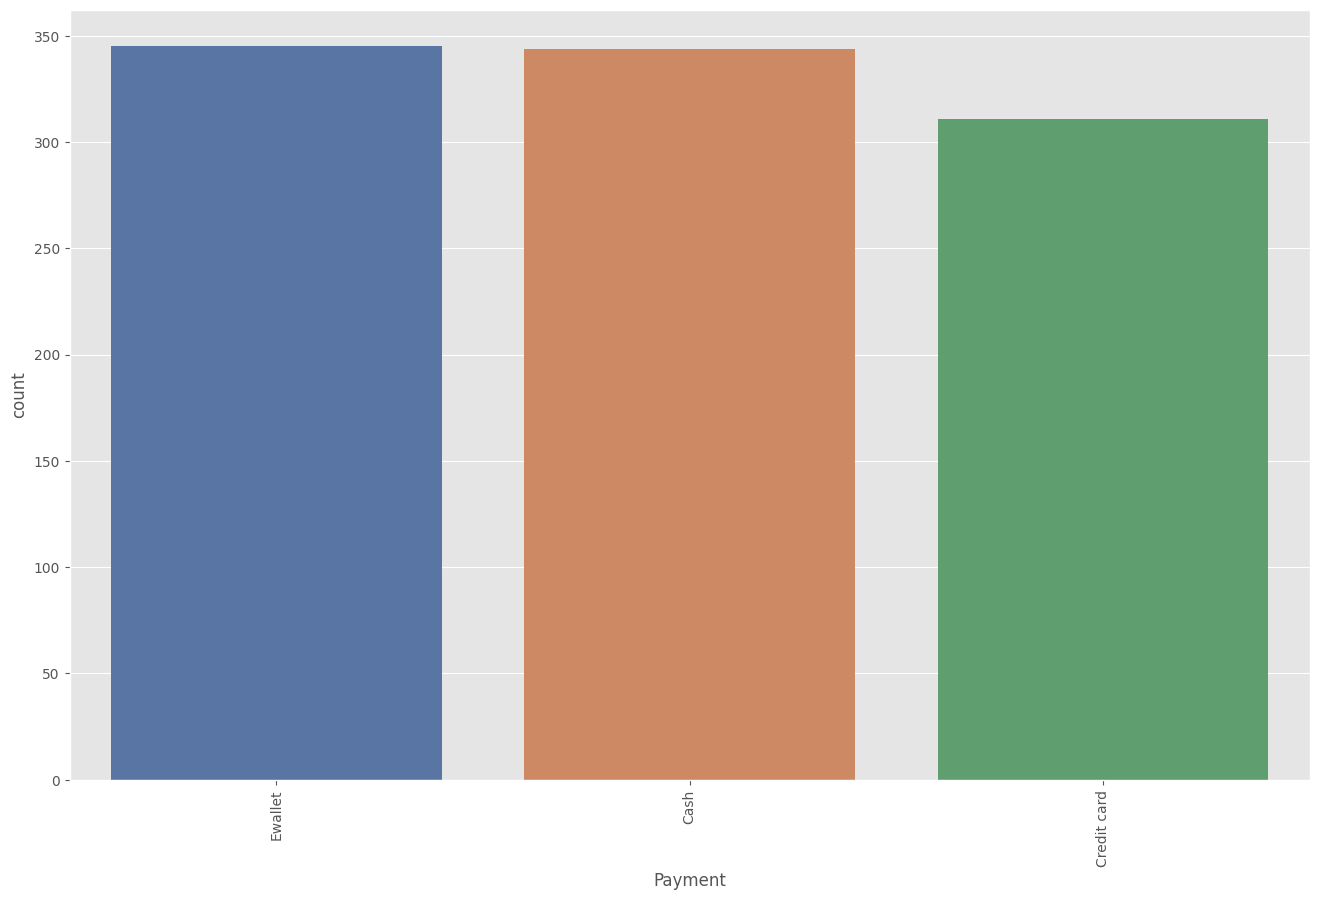

In [102]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
    plt.figure(figsize = (16,10))
    ax = sns.countplot(x=df[col], hue=df[col], palette='deep')
    ax.legend().set_visible(False)
    plt.xticks(rotation=90)
    plt.show()

In [103]:
import plotly.express as px
from datetime import date

WIDTH=800
ds = df.copy()
ds['month'] = pd.to_datetime(df['Date']).dt.month
ds = ds['month'].value_counts().reset_index()
ds.columns = ['month', 'count']
fig = px.bar(ds, x='month', y="count", orientation='v', title="Sales month of the year", width=WIDTH, height=600)
fig.show()

In [104]:
WIDTH = 800
ds = df.copy()
ds['Time'] = pd.to_datetime(ds['Time']).dt.hour
ds = ds['Time'].value_counts().reset_index()
ds.columns = ['hour', 'count']
fig = px.bar(ds, x='hour', y='count', orientation='v', title='Distribution Across Hours', width=WIDTH, height=600)
fig.show()

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_12204\1407521186.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



- - Verifie outliers

<Axes: xlabel='Rating'>

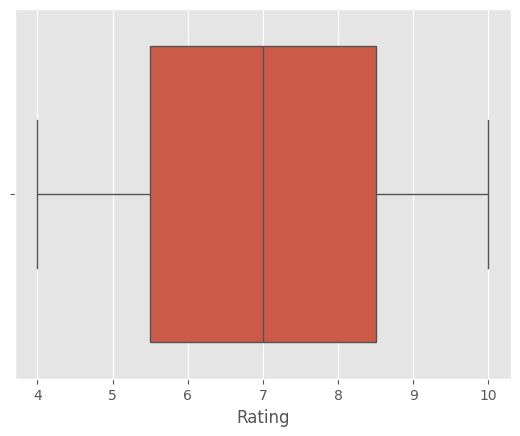

In [105]:
sns.boxplot(x=df['Rating'])    

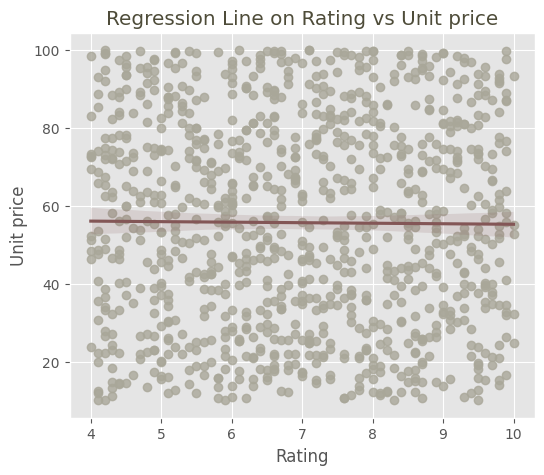

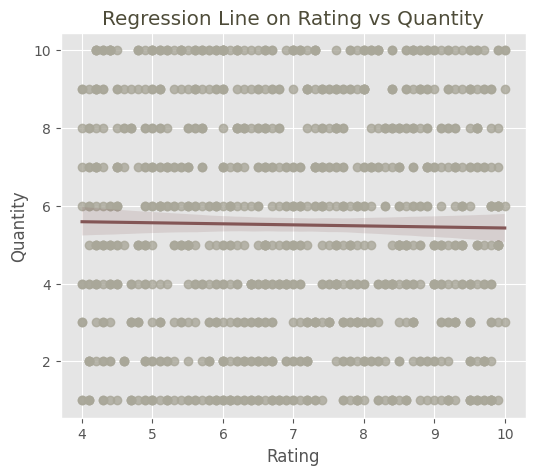

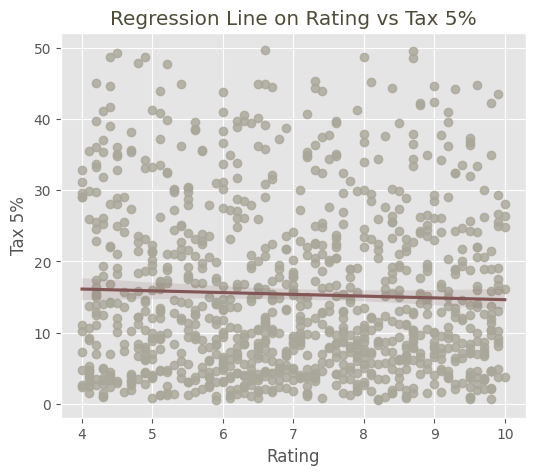

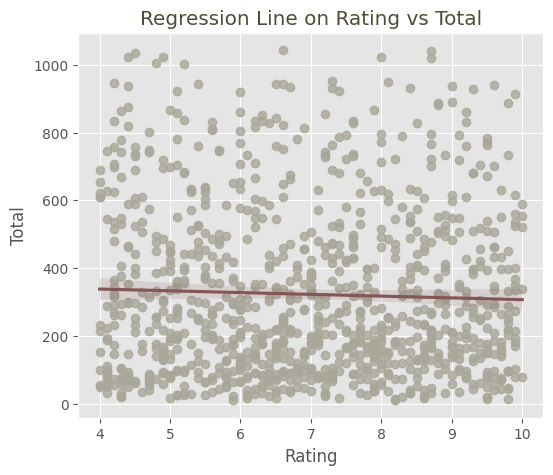

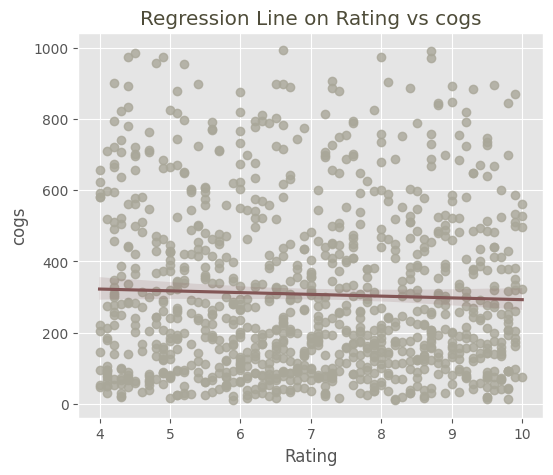

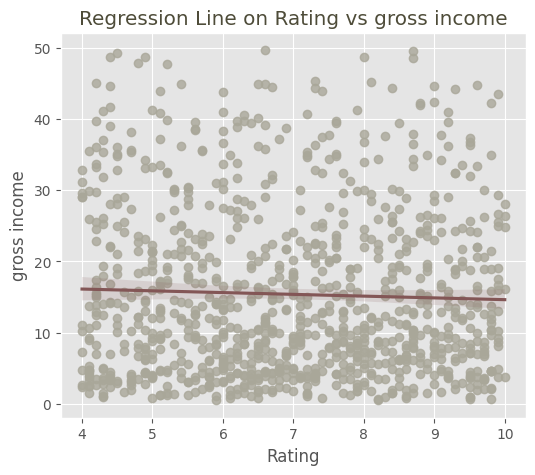

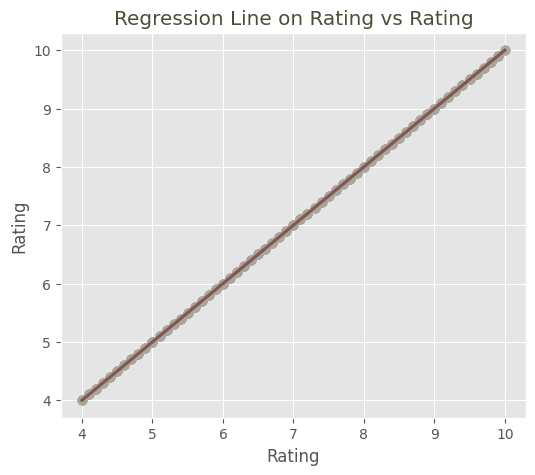

In [106]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.regplot(x="Rating", y=col, data=df, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
    ax.set_title("Regression Line on Rating vs " + col , color="#4e4c39")
    plt.show(ax)

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation variables/variables : (Taux de corre variables/variables>0.9)

In [107]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_12204\2029396998.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<Axes: >

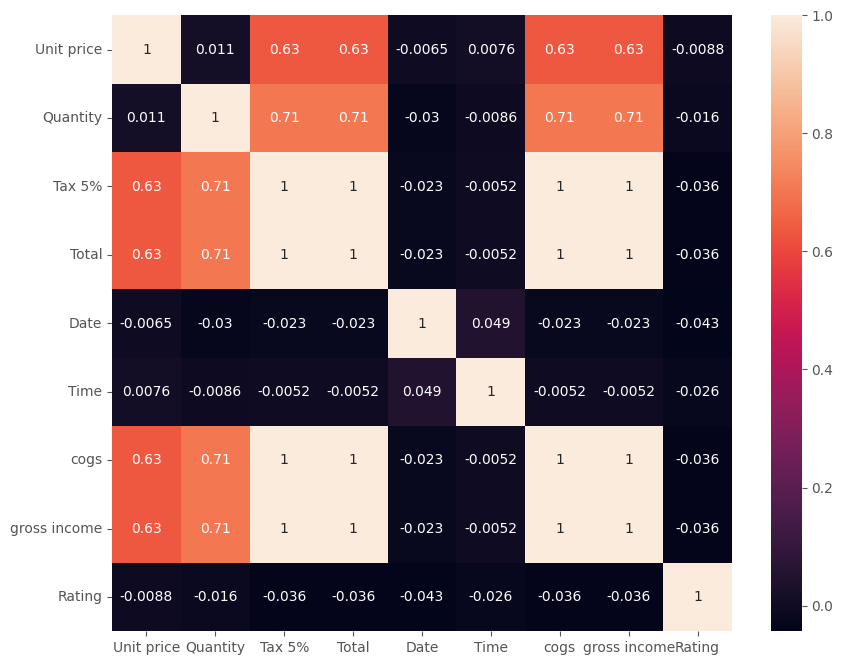

In [108]:
numeric_cols = df.select_dtypes(exclude='object').columns
df_corr = df[numeric_cols].dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True )

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



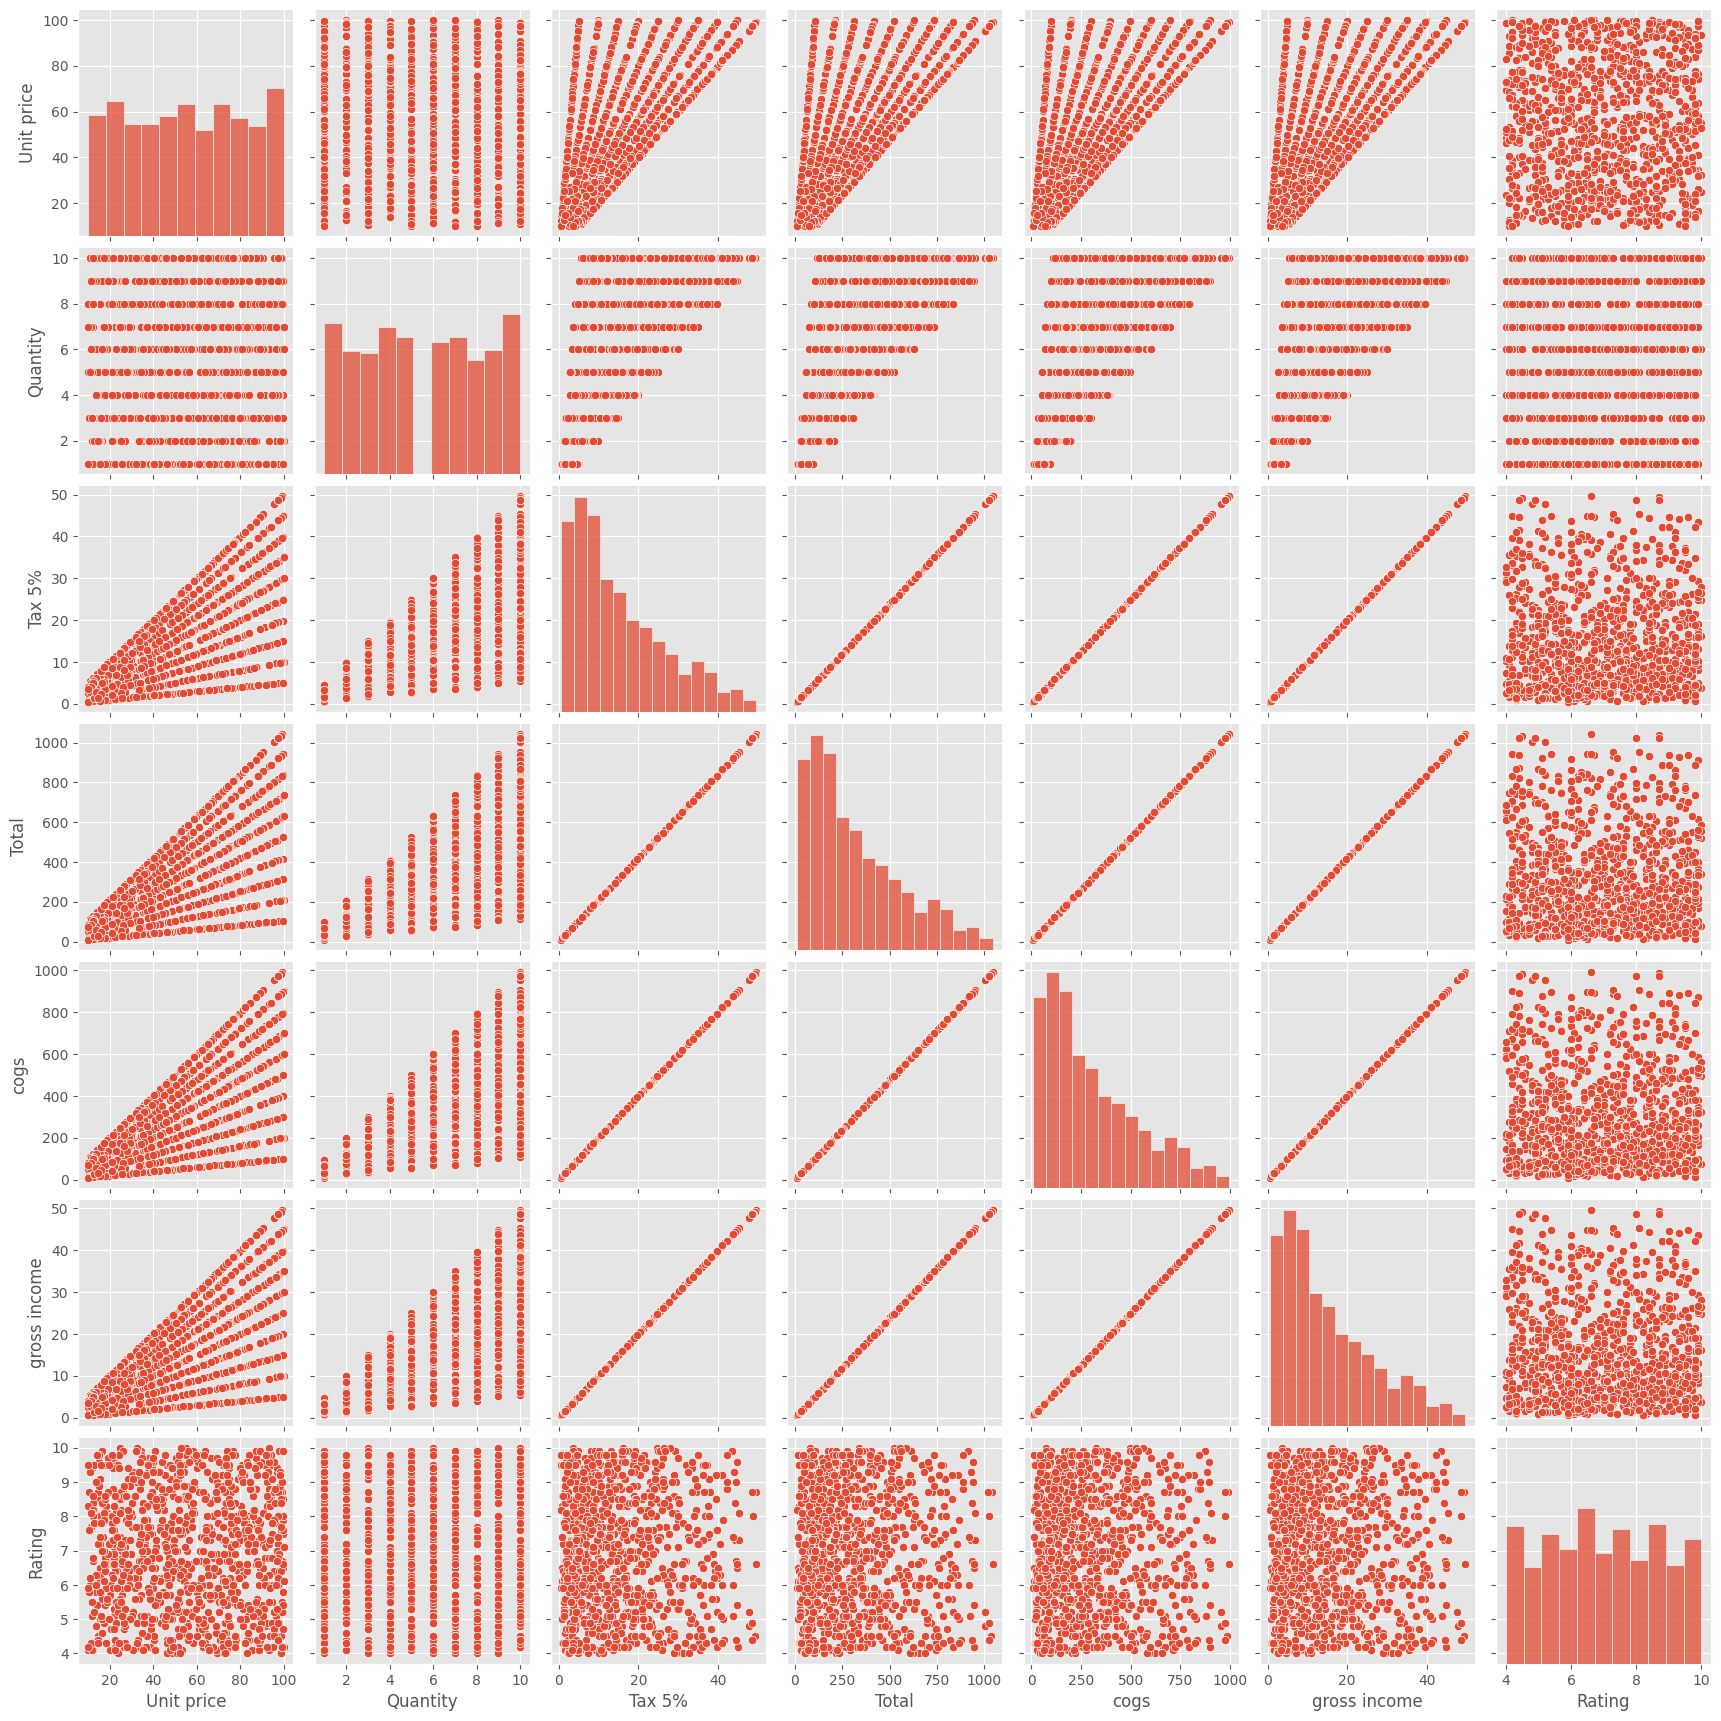

In [109]:
sns.pairplot(df)
plt.show()

['Tax 5%', 'cogs']
['Total']
[]


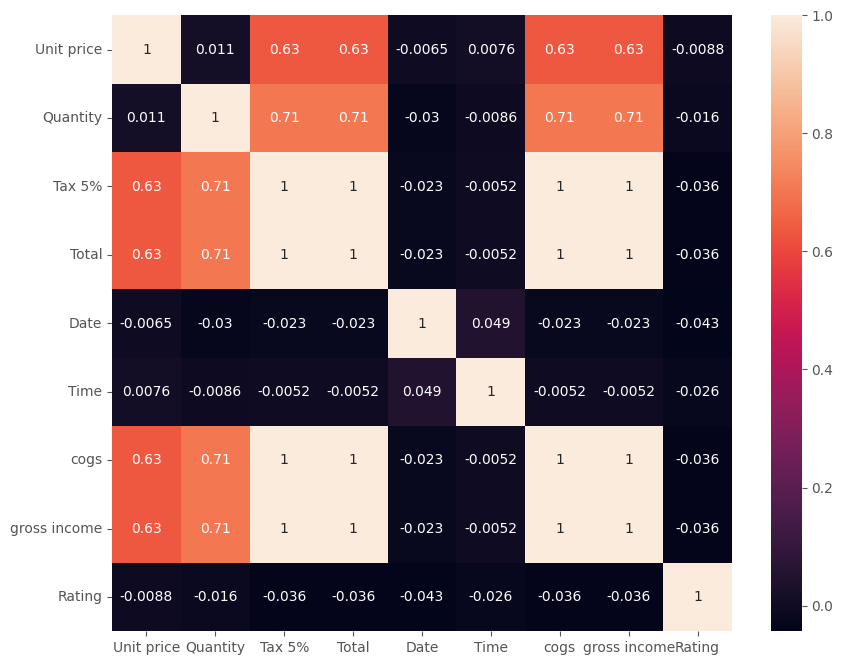

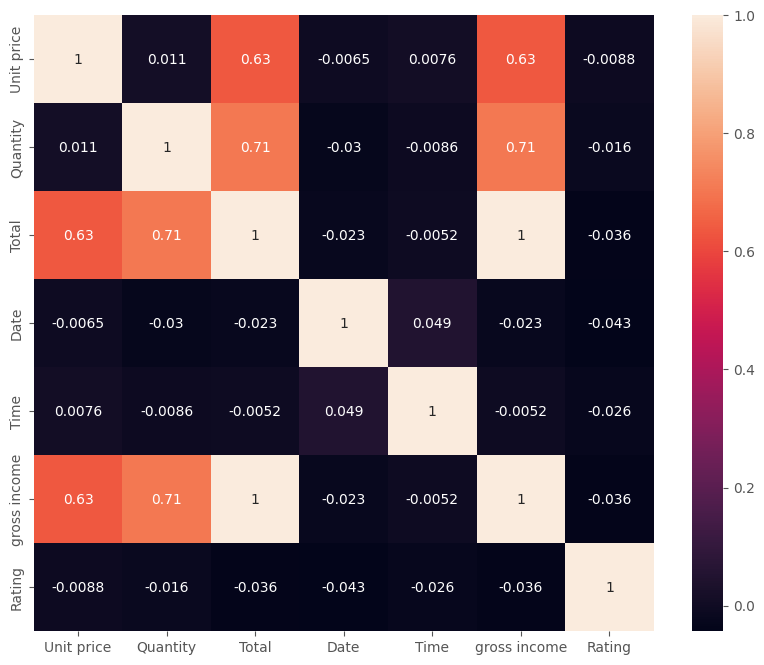

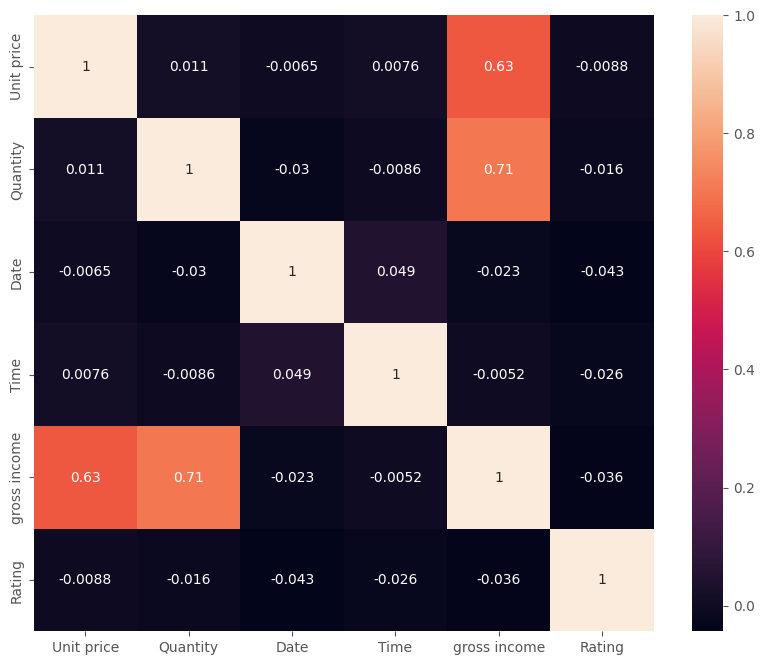

In [110]:
result_list = [1]
while result_list:
    result_list.clear()
    # Calculate the correlation matrix
    numeric_cols = df.select_dtypes(exclude='object').columns
    df_corr = df[numeric_cols].dropna().corr()
    correlation_matrix = df_corr
    # Find indices and columns where correlation is equal to 1 under the diagonal
    correlation_equals_1_under_diagonal = (correlation_matrix.where(np.tril(correlation_matrix, k=-1) >= 0.999) >= 0.999)
    #===============================
    # Extraire les colonnes ayant une corrélation de True
    columns_with_corr_1 = correlation_equals_1_under_diagonal.index[correlation_equals_1_under_diagonal.any()]
    # Convertir les colonnes en liste
    columns_with_corr_1_list = columns_with_corr_1.tolist()
    #===============================
    # Extraire les lignes avec exactement un seul True
    rows_with_single_true = correlation_equals_1_under_diagonal[correlation_equals_1_under_diagonal.any(axis=1) & (correlation_equals_1_under_diagonal.sum(axis=1) == 1)]
    # Convertir les colonnes en liste
    rows_list_with_single_true = rows_with_single_true.index.tolist()
    #===============================
    result_list = [item for item in columns_with_corr_1_list if item not in rows_list_with_single_true]
    df = df.drop(result_list, axis = 1)
    df.head()
    print(result_list)
    # Plot the correlation matrix heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(df_corr, annot=True)

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



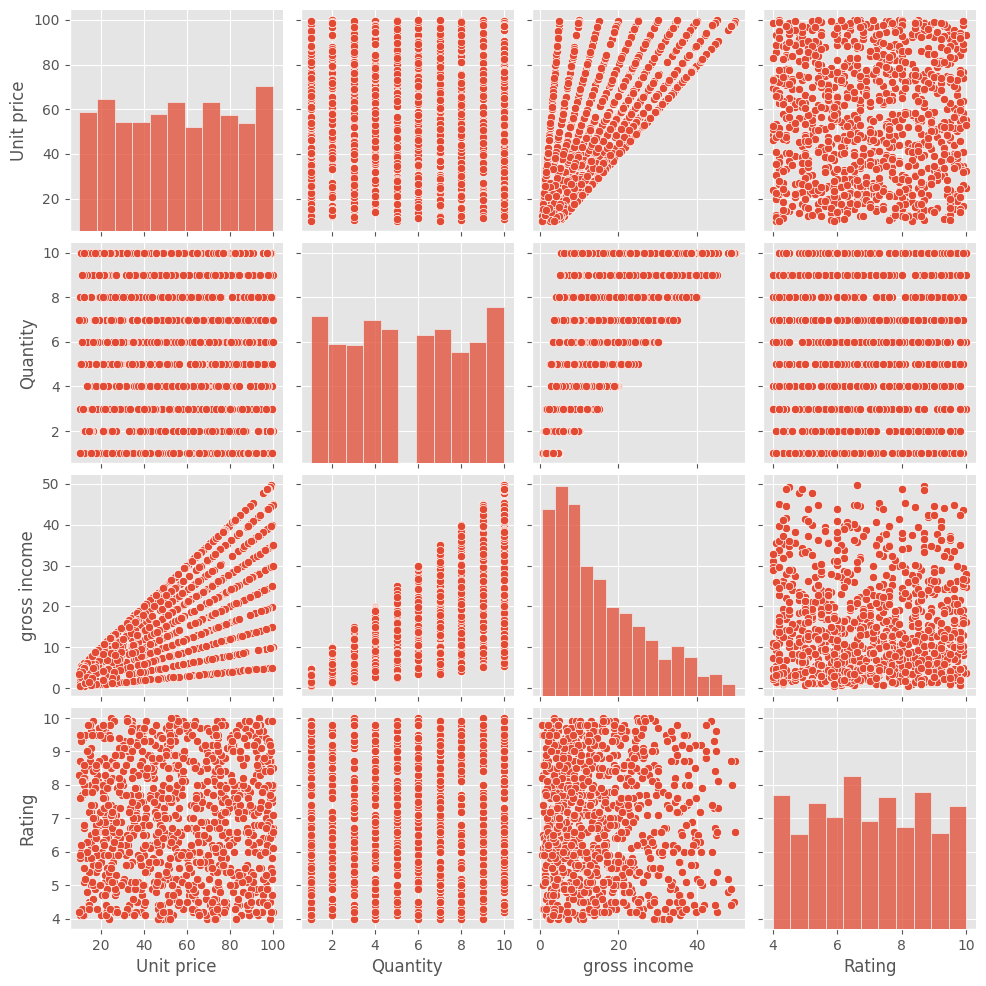

In [111]:
sns.pairplot(df)
plt.show()

- - Relation Target/Variables : (Taux corr variables/target >0.9) We ll try to understand how the target and other types variables relate.. 

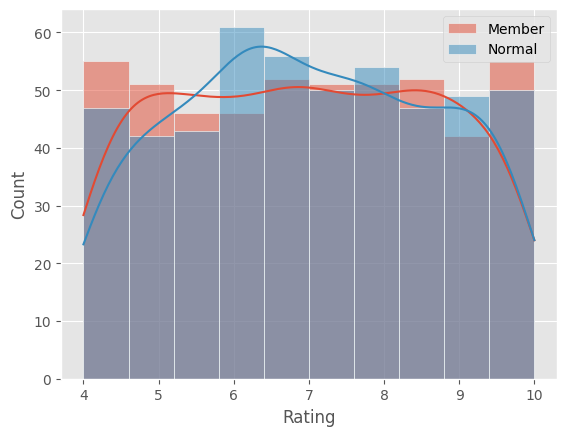

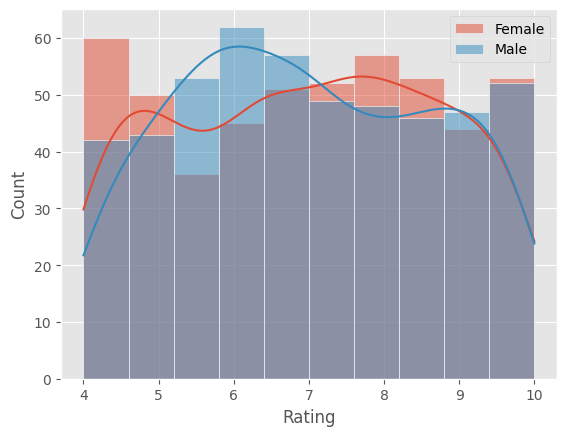

In [112]:
for col in df.select_dtypes(include=['object','int']):
    if len(df[col].unique()) <3 :
        plt.figure()                                 
        for cat in df[col].unique():
            sns.histplot(df[df[col]==cat]['Rating'],kde=True,label=cat)
        plt.legend()

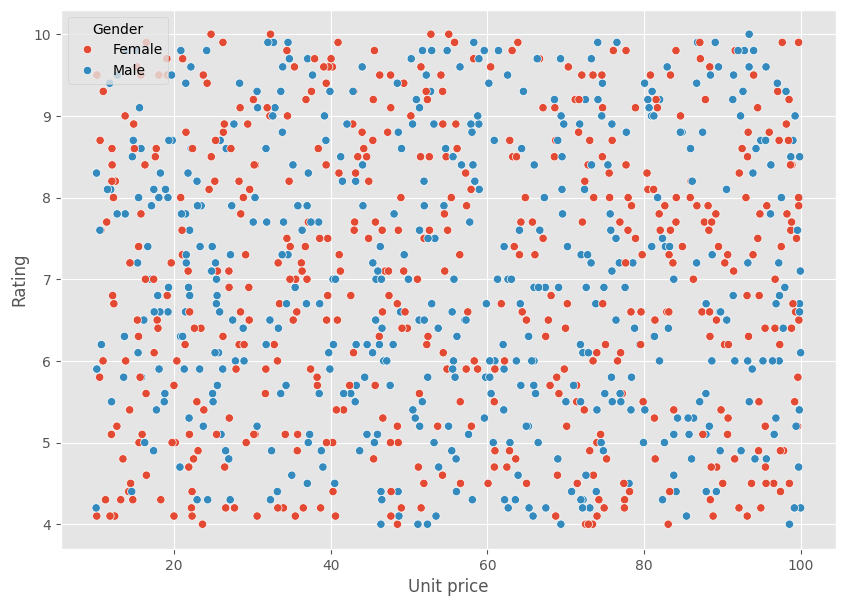

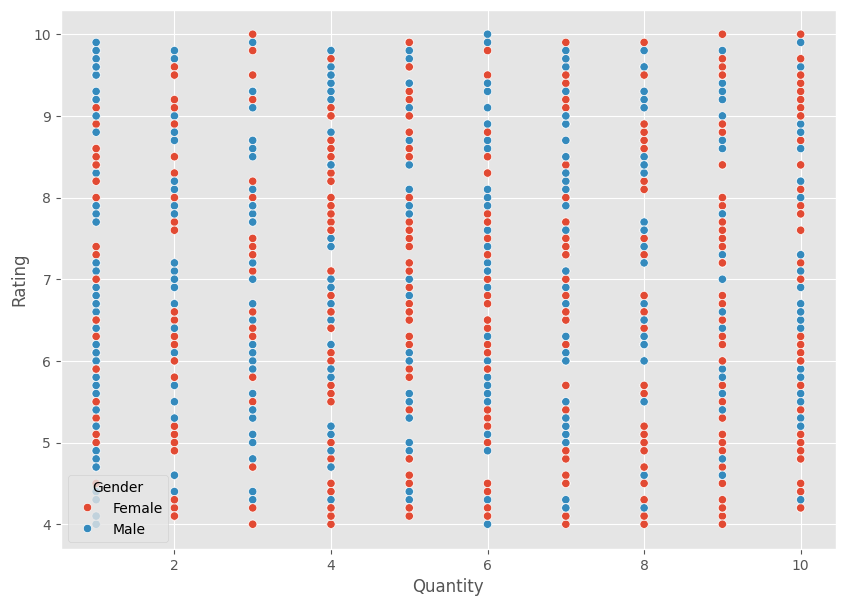

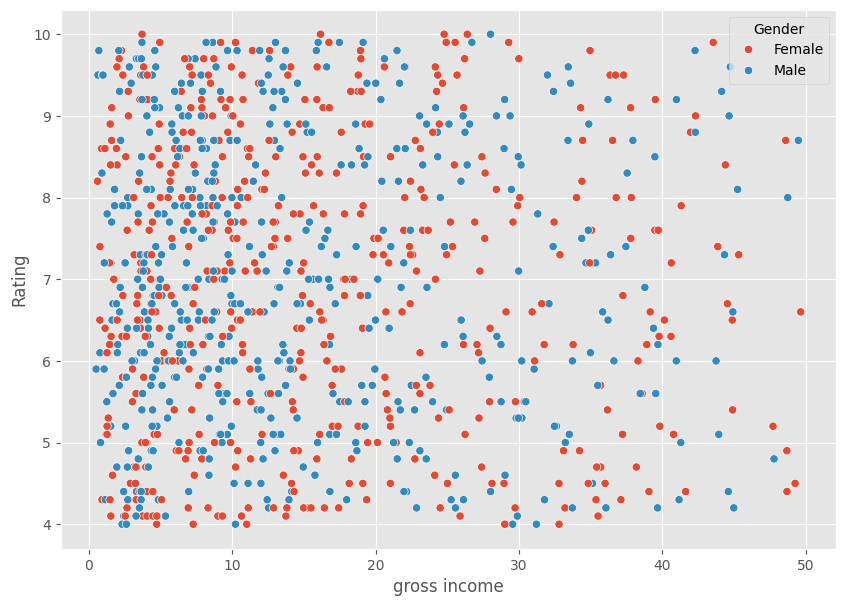

In [113]:
for col in df.select_dtypes(include=['float64','int']):  
    if col != 'Rating' :
        plt.figure(figsize=(10,7))
        sns.scatterplot(x=col, y='Rating',hue=df['Gender'], data=df)
        plt.show()

- - Relation Column/Column : (very usefull)

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_12204\835784637.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

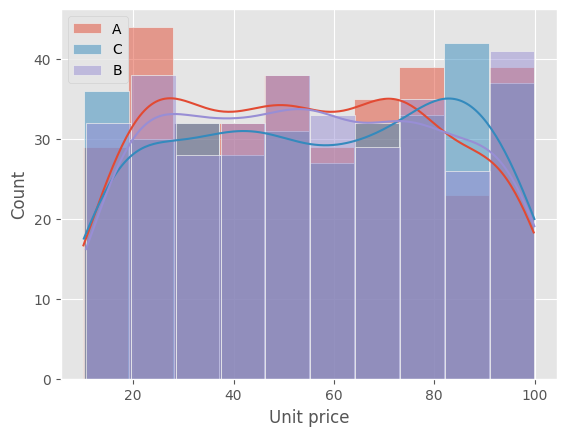

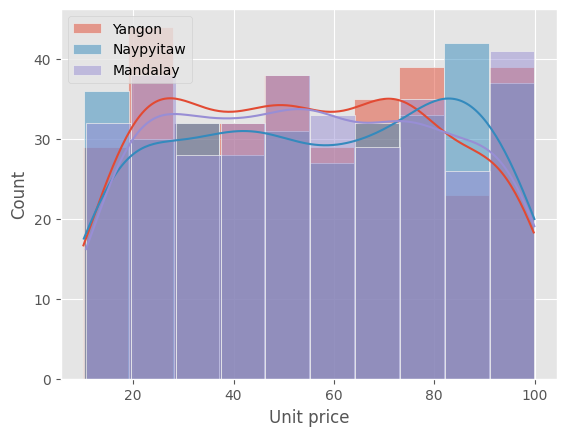

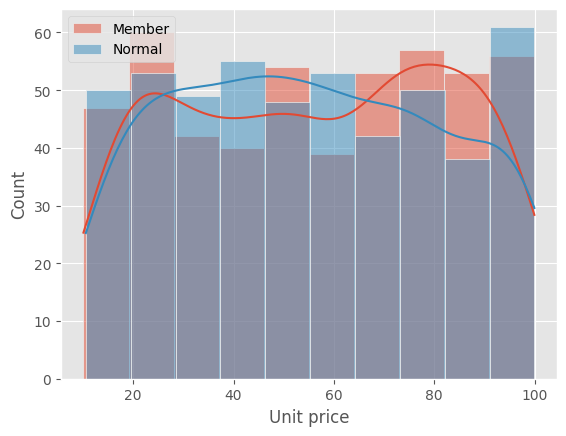

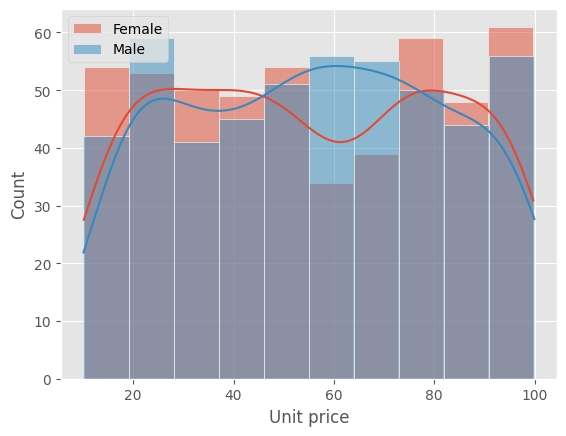

<Figure size 640x480 with 0 Axes>

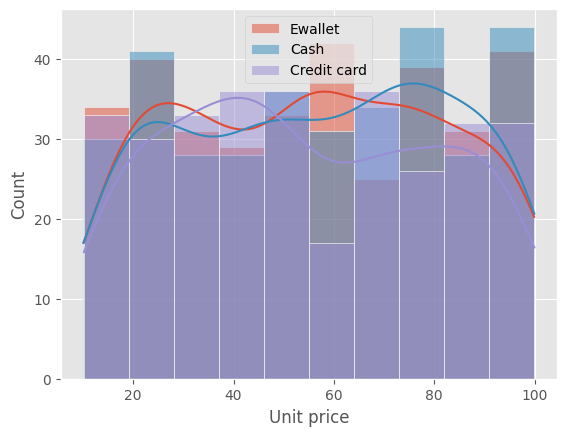

<Figure size 640x480 with 0 Axes>

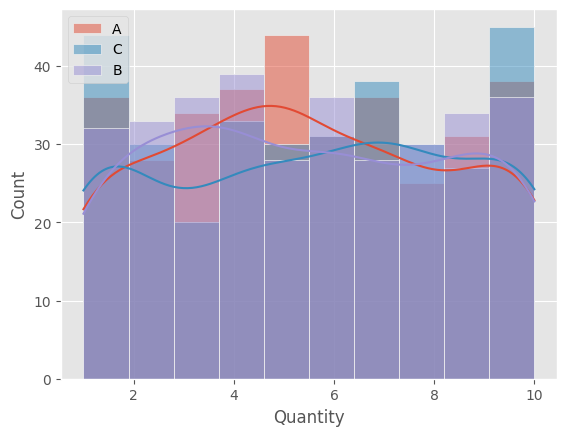

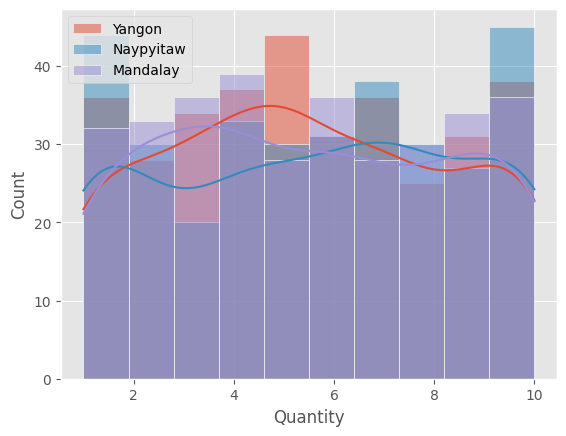

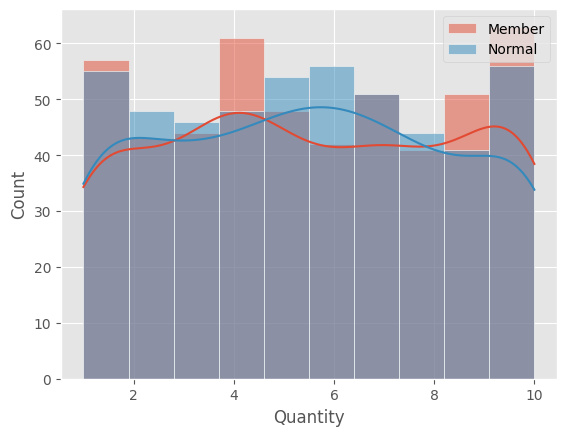

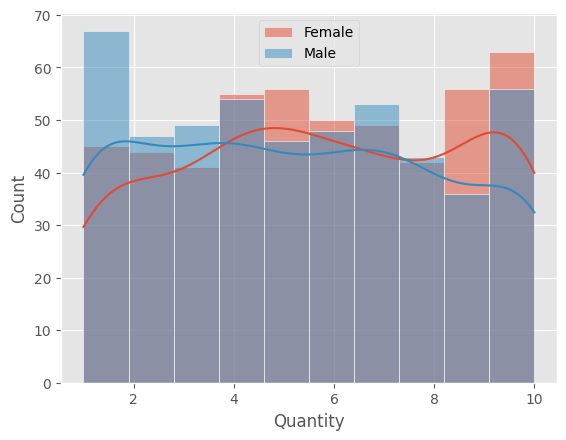

<Figure size 640x480 with 0 Axes>

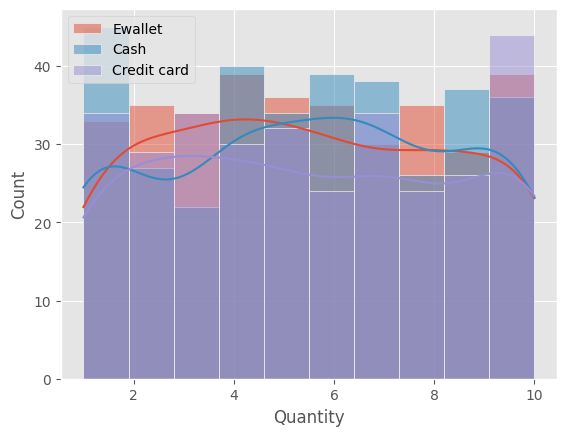

<Figure size 640x480 with 0 Axes>

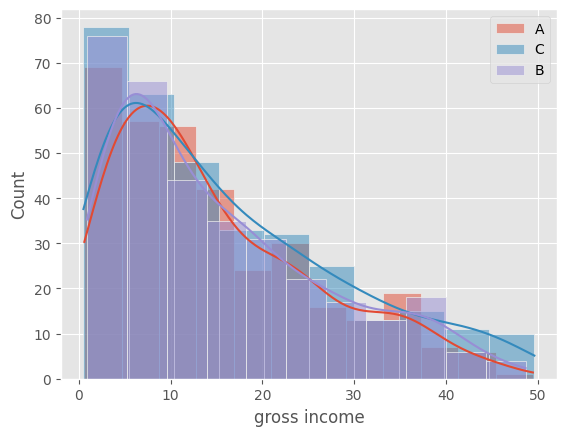

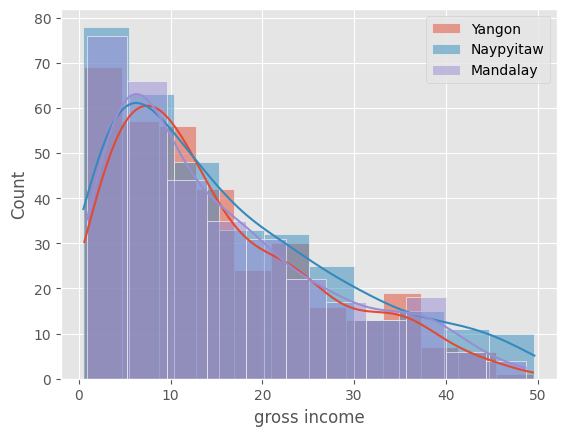

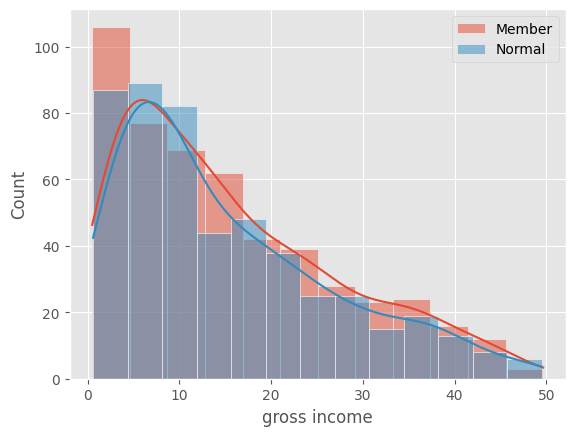

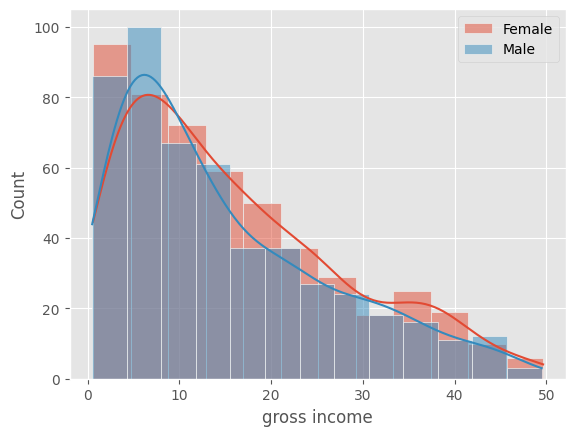

<Figure size 640x480 with 0 Axes>

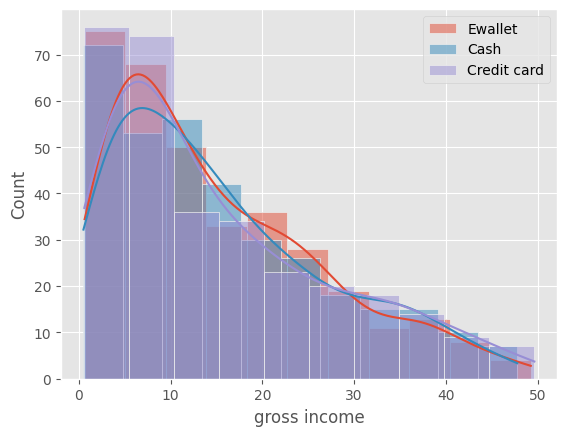

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [114]:
for col in df.select_dtypes(include=['float','int']):           
    plt.figure()   
    for col2 in df.select_dtypes(include=['object']):
        plt.figure() 
        if len(df[col2].unique()) <4 and col != 'Rating' and col2 != 'Rating' :
            for cat in df[col2].unique():
                #Data_A=Data[Data['column_y']==A]
                sns.histplot(df[df[col2]==cat][col],kde=True,label=cat)
            plt.legend()

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_12204\1566887641.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

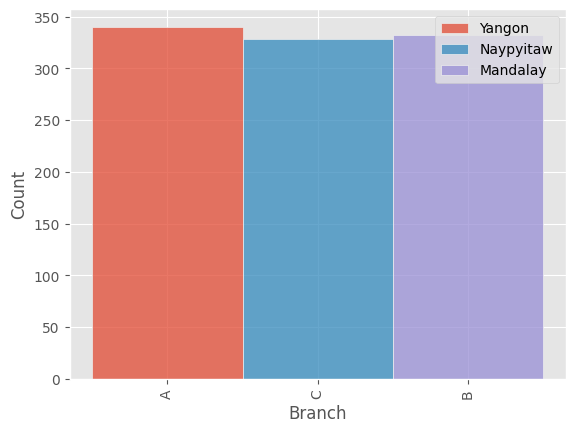

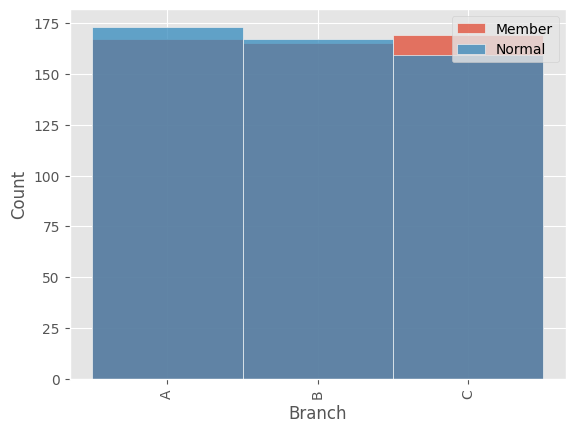

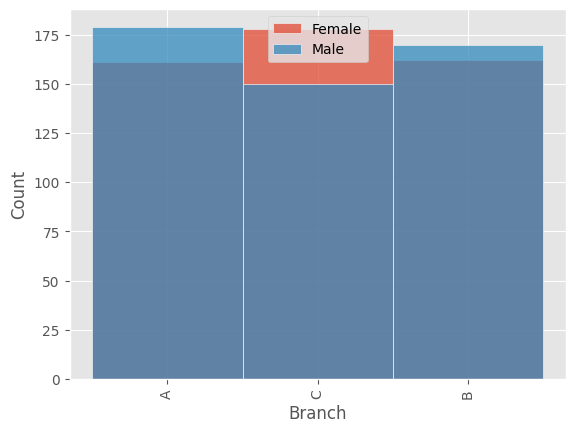

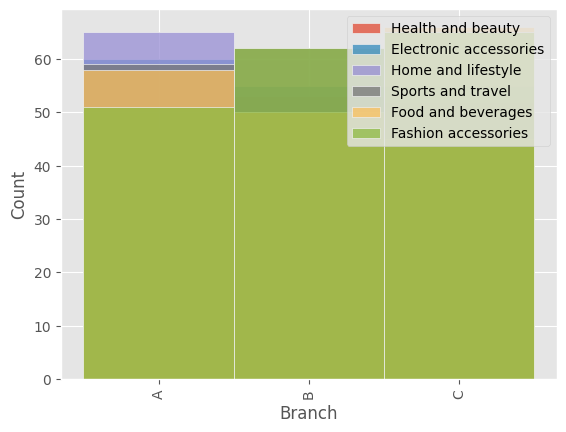

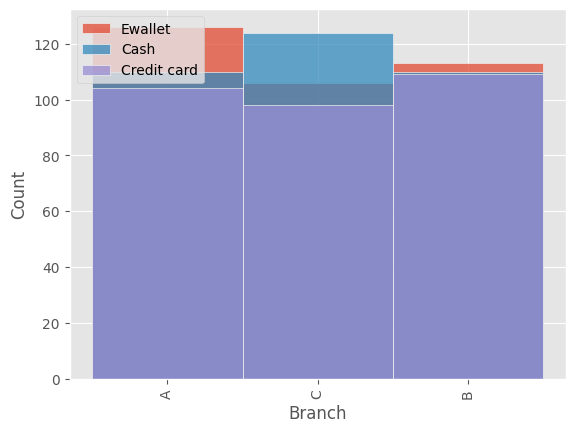

<Figure size 640x480 with 0 Axes>

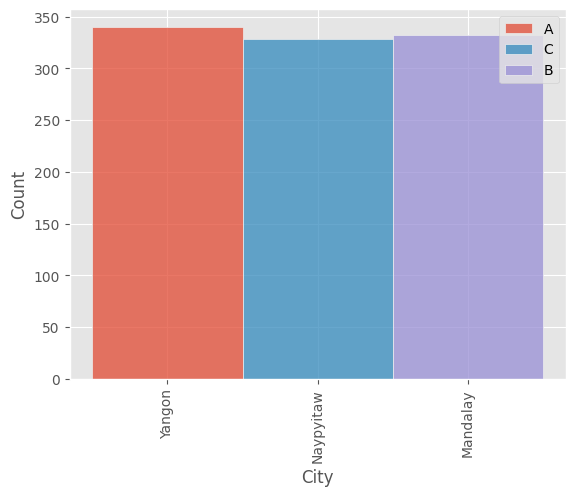

<Figure size 640x480 with 0 Axes>

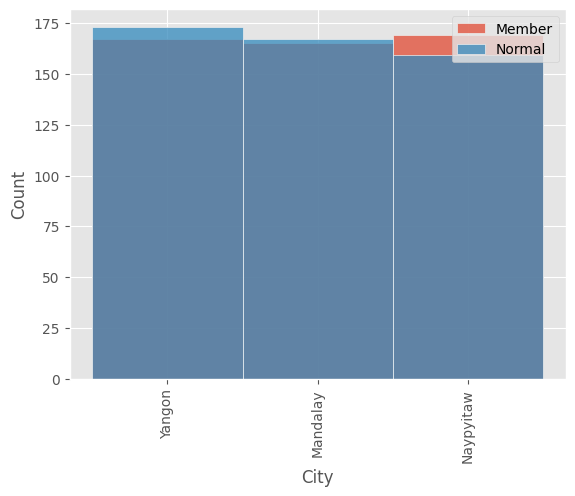

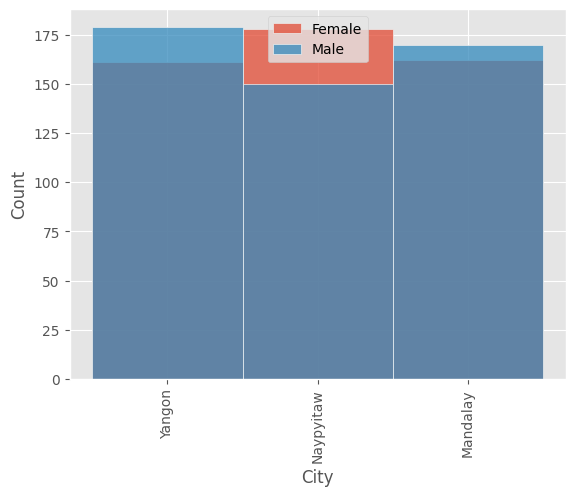

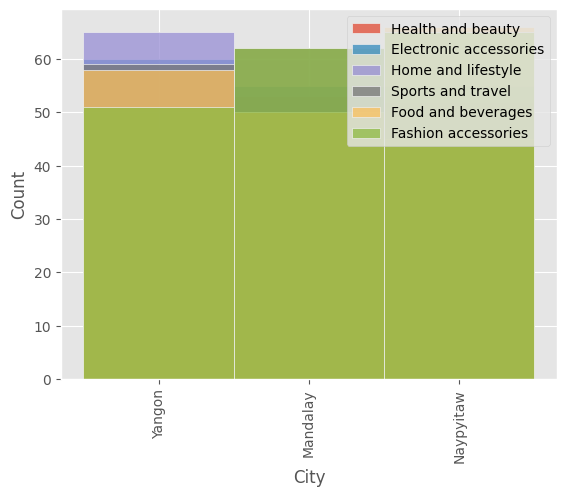

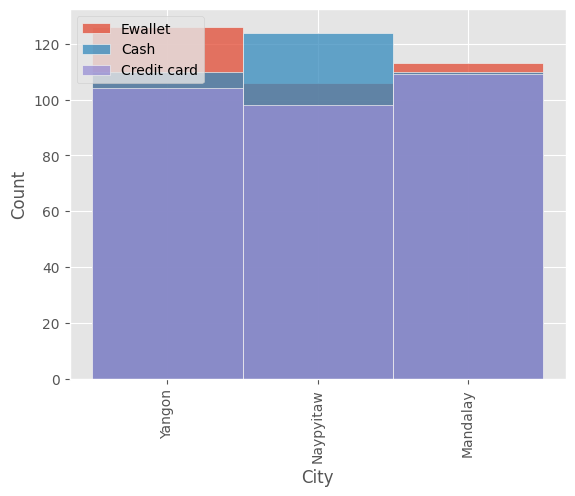

<Figure size 640x480 with 0 Axes>

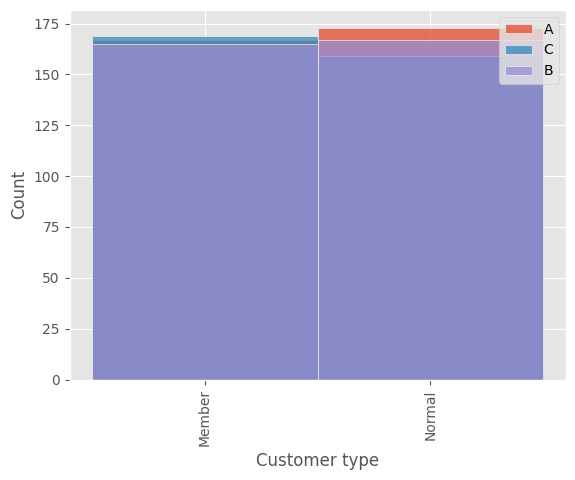

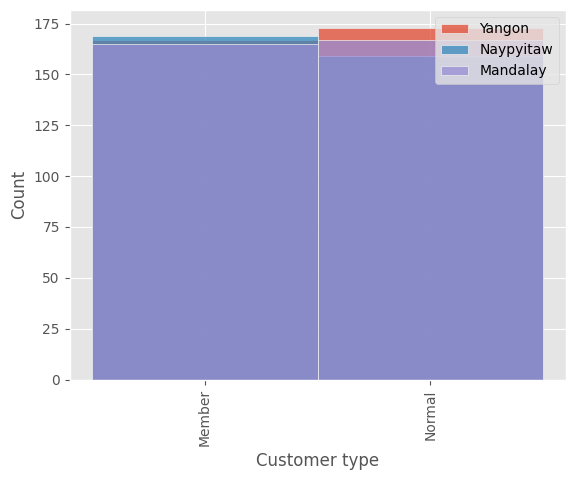

<Figure size 640x480 with 0 Axes>

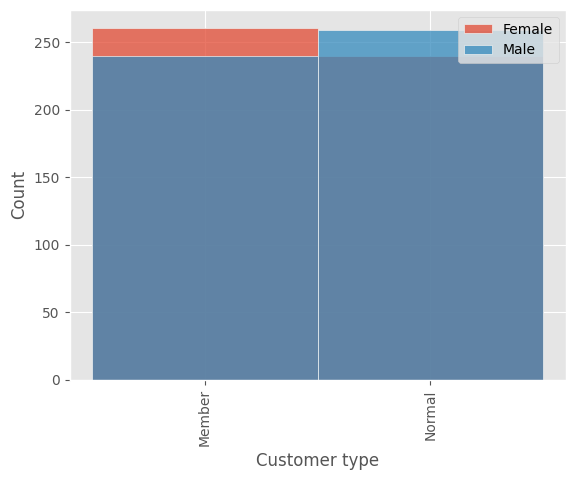

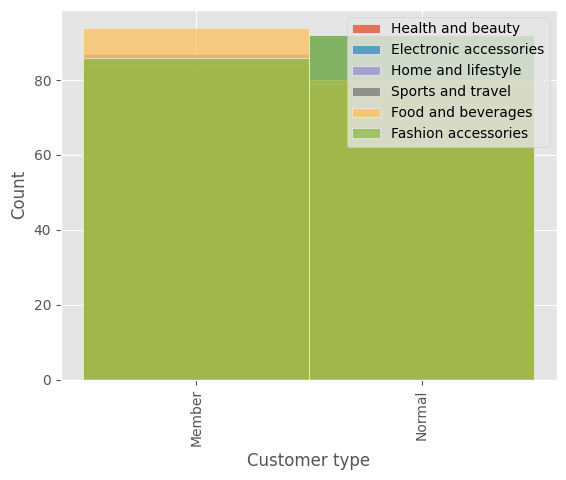

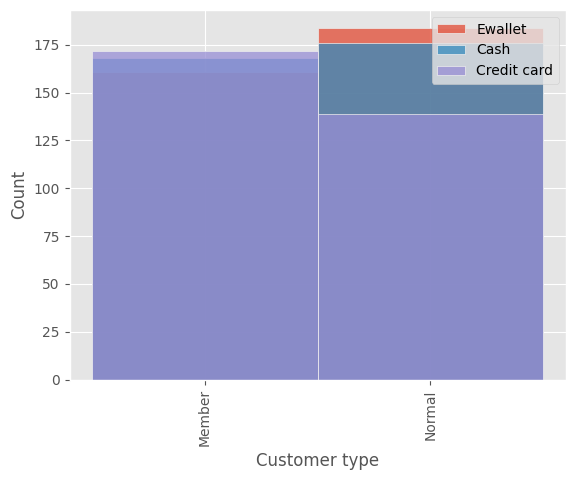

<Figure size 640x480 with 0 Axes>

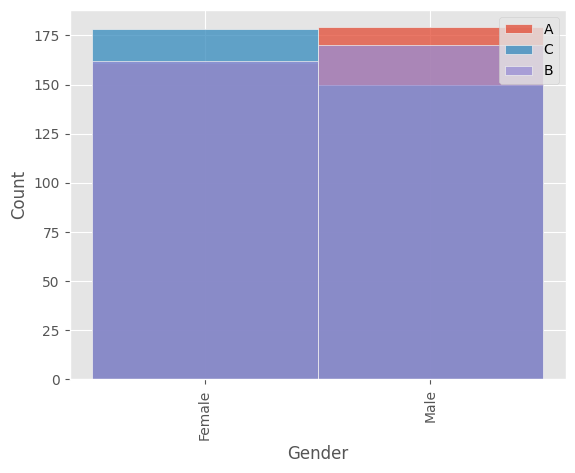

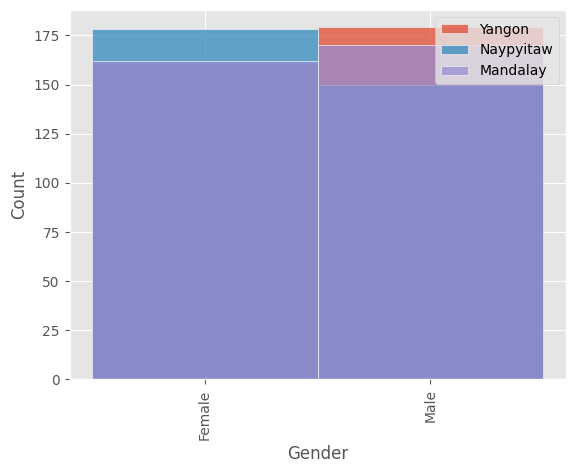

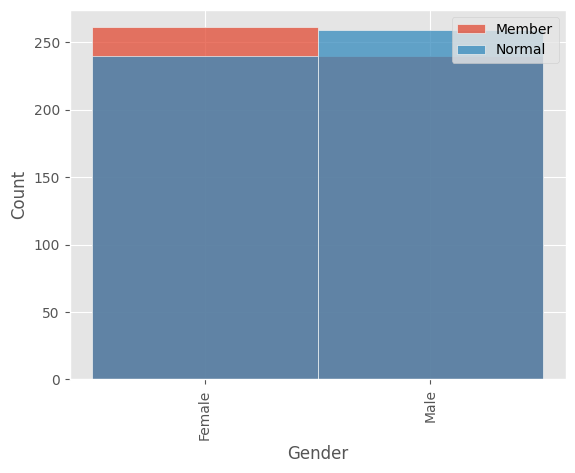

<Figure size 640x480 with 0 Axes>

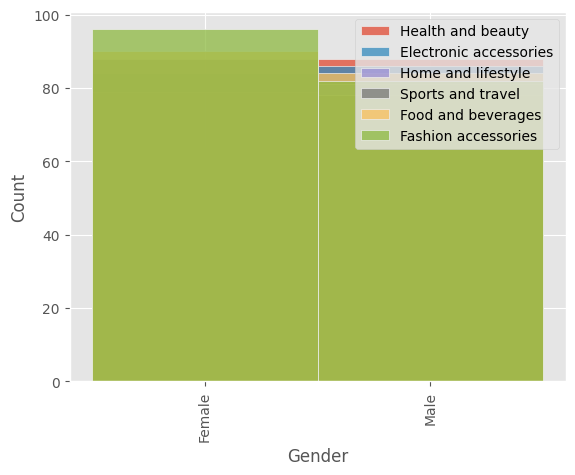

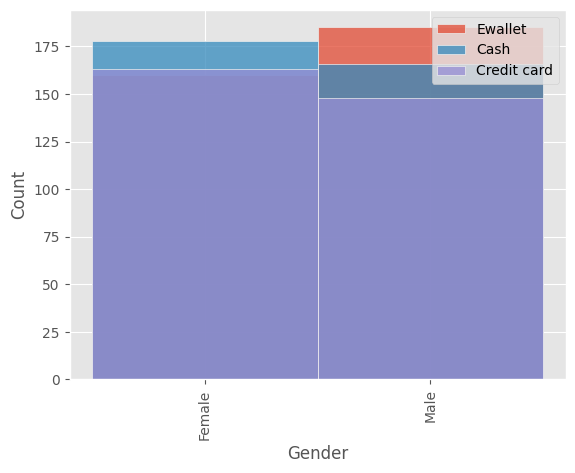

<Figure size 640x480 with 0 Axes>

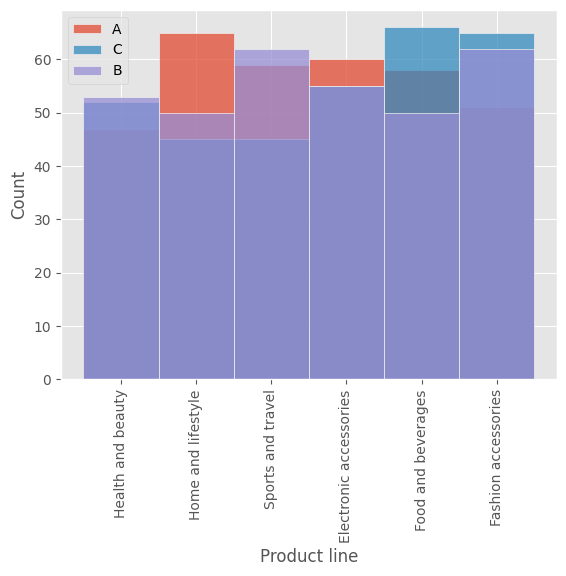

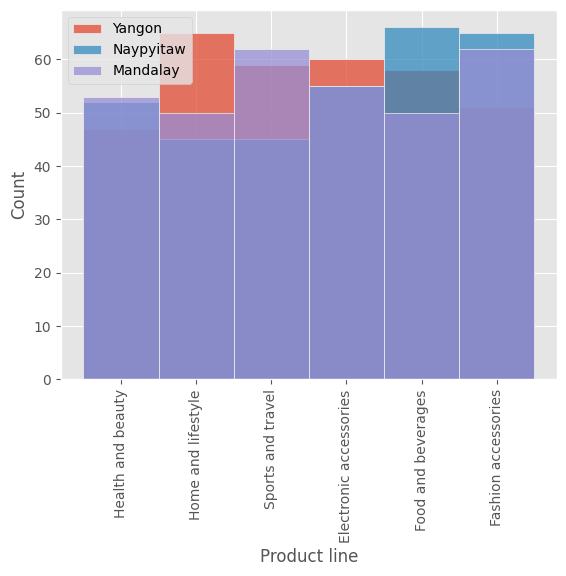

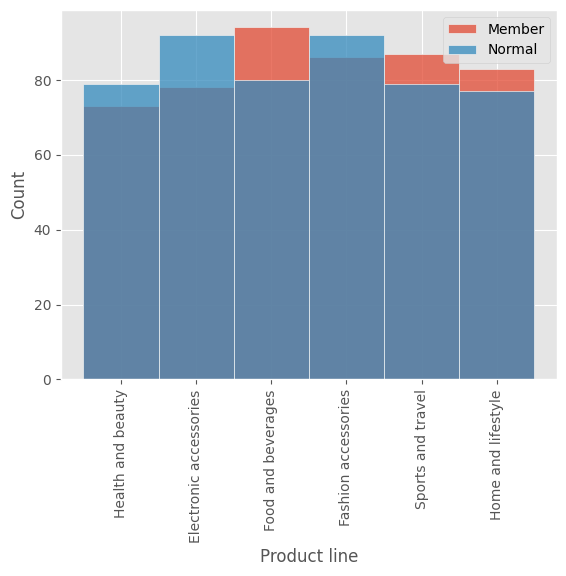

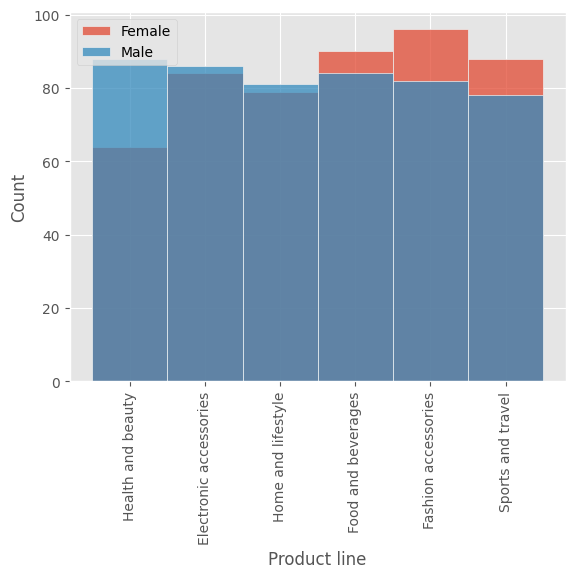

<Figure size 640x480 with 0 Axes>

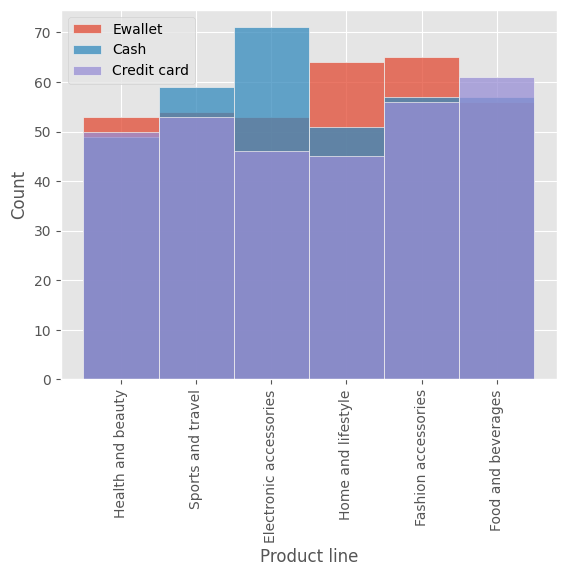

<Figure size 640x480 with 0 Axes>

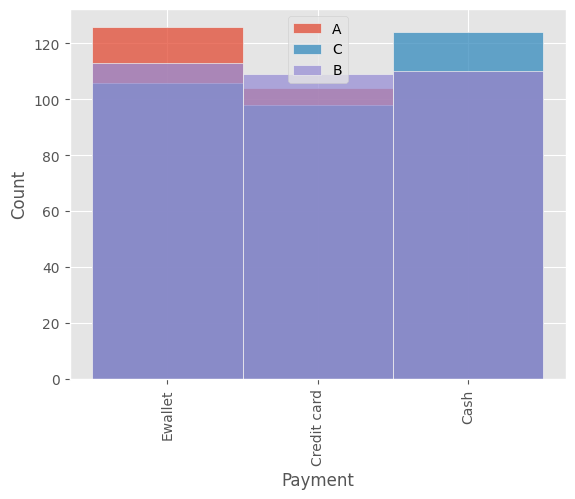

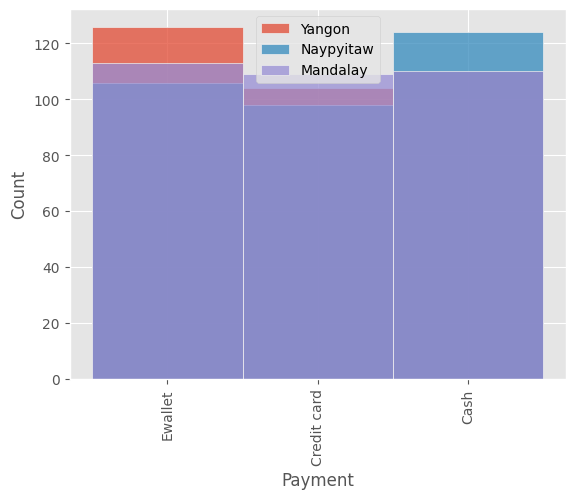

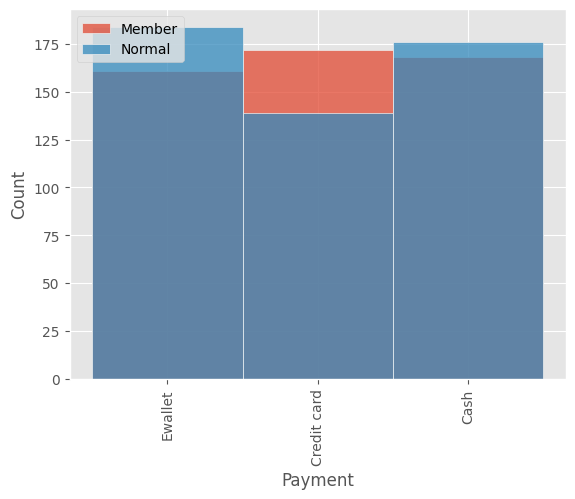

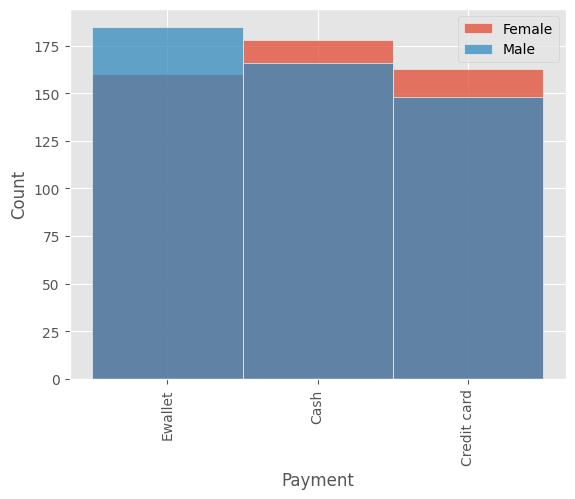

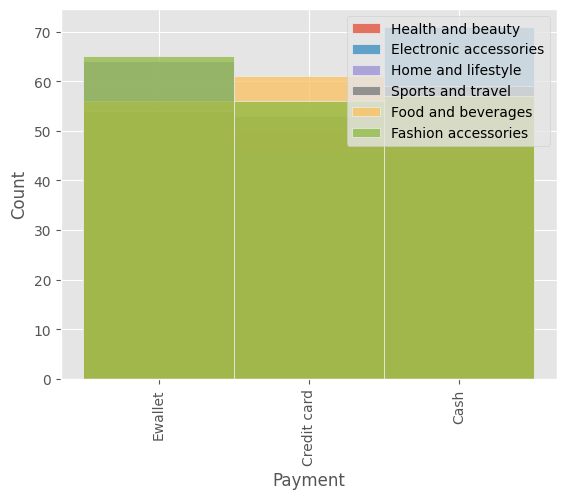

<Figure size 640x480 with 0 Axes>

In [115]:
for col in df.select_dtypes(include=['object']):           
    plt.figure()   
    for col2 in df.select_dtypes(include=['object']):
        plt.figure() 
        if len(df[col2].unique()) <9 and col !=col2 and col != 'Rating' and col2 != 'Rating' :
            for cat in df[col2].unique():
                #Data_A=Data[Data['column_y']==A]
                sns.histplot(df[df[col2]==cat][col],kde=False,label=cat)
            plt.legend()
            plt.xticks(rotation = 90)

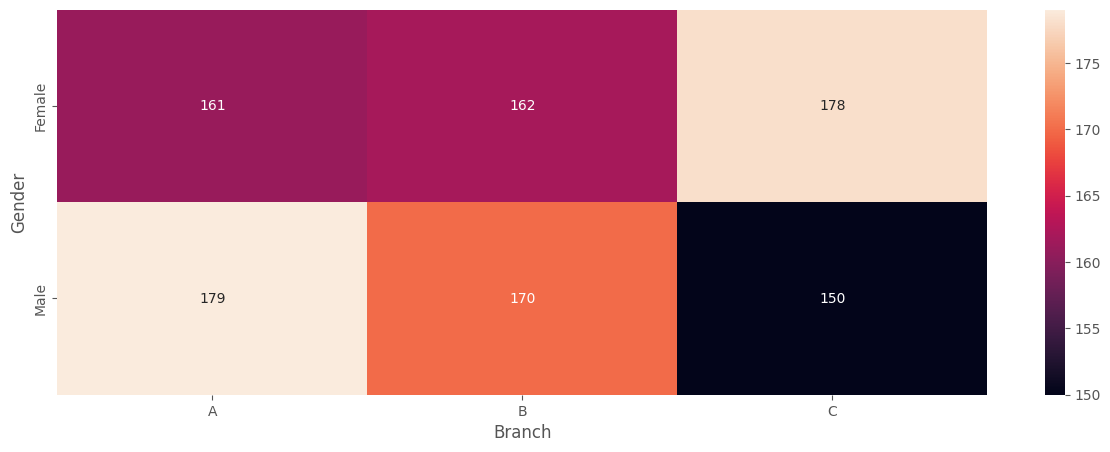

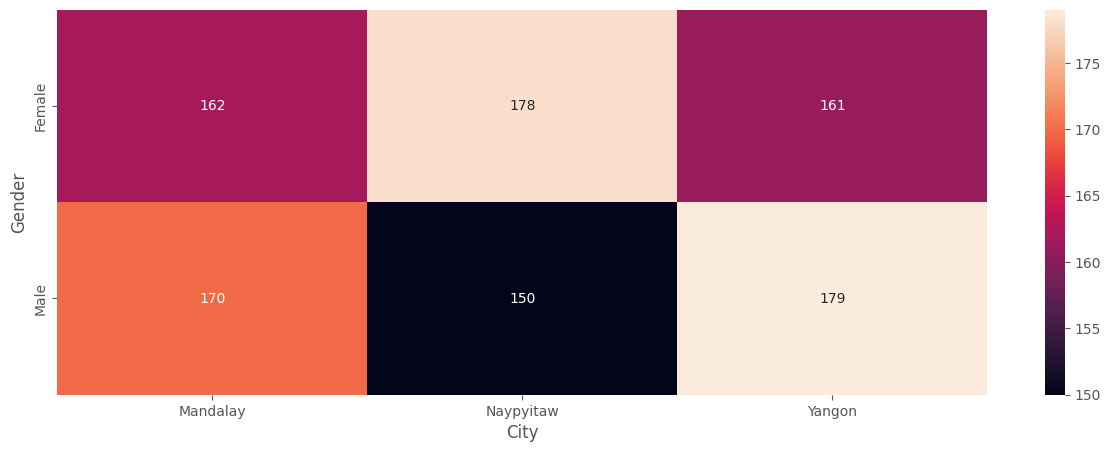

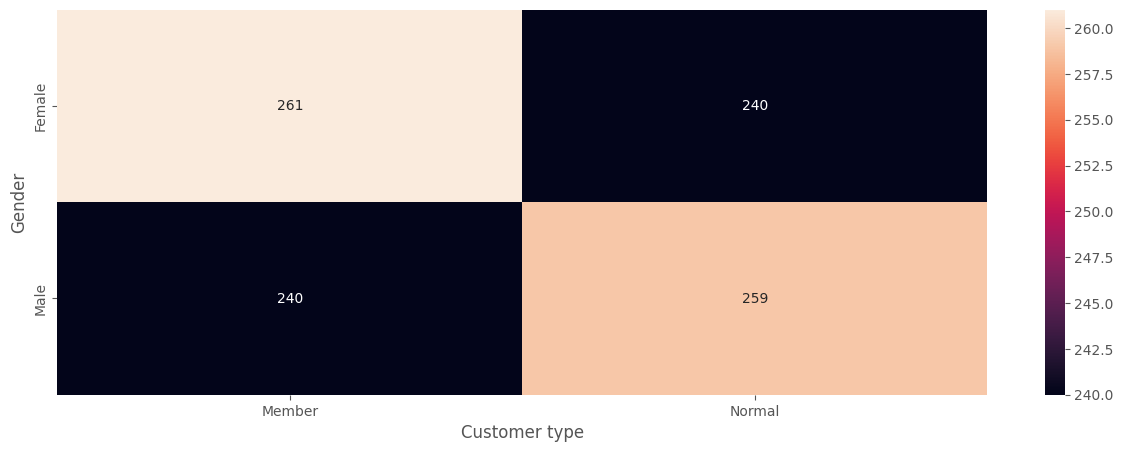

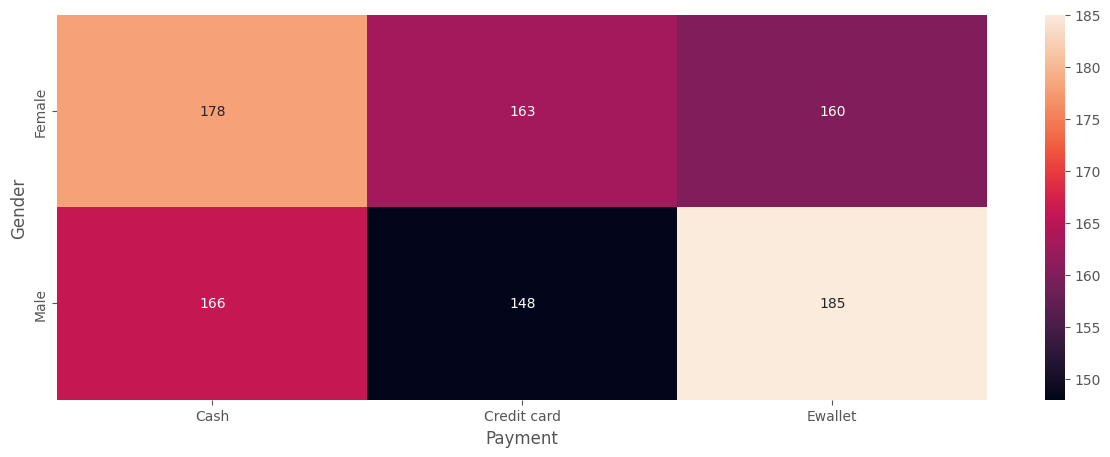

In [116]:
for col in df.select_dtypes(include=['object']):
    if len(df[col].unique()) <4 and col != 'Gender' :
        plt.figure(figsize=(15,5))
        sns.heatmap(pd.crosstab(df['Gender'],df[col]), annot=True, fmt='d') 

In [117]:
df.describe()

Unit price     Quantity                        Date  \
count  1000.000000  1000.000000                        1000   
mean     55.672130     5.510000  2019-02-14 00:05:45.600000   
min      10.080000     1.000000         2019-01-01 00:00:00   
25%      32.875000     3.000000         2019-01-24 00:00:00   
50%      55.230000     5.000000         2019-02-13 00:00:00   
75%      77.935000     8.000000         2019-03-08 00:00:00   
max      99.960000    10.000000         2019-03-30 00:00:00   
std      26.494628     2.923431                         NaN   

                             Time  gross income      Rating  
count                        1000   1000.000000  1000.00000  
mean   2024-01-07 15:24:41.880000     15.379369     6.97270  
min           2024-01-07 10:00:00      0.508500     4.00000  
25%           2024-01-07 12:43:00      5.924875     5.50000  
50%           2024-01-07 15:19:00     12.088000     7.00000  
75%           2024-01-07 18:15:00     22.445250     8.50000  
max           2024-01-07 20:59:00     49.650000    10.00000  
std                           NaN     11.708825     1.71858

In [118]:
bins = (4, 7, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['Rating'], bins = bins, labels = group_names)

In [119]:
Female_sum = df[(df['quality'] =='good')&(df['Gender']=='Female')]['Gender'].count()
Female_percent = df[(df['Gender']=='Female')]['Gender'].count()
Male_sum = df[(df['quality'] =='good')&(df['Gender']=='Male')]['Gender'].count()
Male_percen=df[(df['Gender']=='Male')]['Gender'].count()

total = pd.DataFrame([Female_sum,Male_sum], columns=['Total']).rename(index={0: 'Female>7', 1: 'Male>7'})
percent = pd.DataFrame([Female_sum/Female_percent,Male_sum/Male_percen], columns=['percent']).rename(index={0: 'Female>7', 1: 'Male>7'})

Data = pd.concat([total, percent], axis=1)
Data

Total   percent
Female>7    251  0.500998
Male>7      230  0.460922

# [Step 5: Analyse Hypothese]()<a id="6"></a> <br>

- - Rate of 'columns_y' depending to each col => prove if the rate of 'column_y' are not equal

In [120]:
# calculate p for each column of test => compare p with alpha
from scipy.stats import ttest_ind                                                            
def t_test(col):
    alpha=0.02
    #=>array[True, False]           
    index_A=df['quality']=="bad"
    index_B=df['quality']=="good"    
    #=>Data_A=Data[rows['column_y']==A] 
    if pd.api.types.is_numeric_dtype(df[col]):
        Data_A = df[index_A]
        Data_B = df[index_B]
        # dropna for eliminating NaN values for the test
        stat, p = ttest_ind(Data_A[col].dropna(), Data_B[col].dropna())                           
        if p < alpha:
            return 'H0 Rejected X'  # col has a rate not equal for 'column_y' => col has an impact on column_y
        else:
            return 'H0 Not Rejected'  # col has no significant impact on column_y
    else:
        return 'Not Numeric'  # The column is not numeric   

for col in df.columns:
    print(f'{col :-<50} {t_test(col)}')

Branch-------------------------------------------- Not Numeric
City---------------------------------------------- Not Numeric
Customer type------------------------------------- Not Numeric
Gender-------------------------------------------- Not Numeric
Product line-------------------------------------- Not Numeric
Unit price---------------------------------------- H0 Not Rejected
Quantity------------------------------------------ H0 Not Rejected
Date---------------------------------------------- Not Numeric
Time---------------------------------------------- Not Numeric
Payment------------------------------------------- Not Numeric
gross income-------------------------------------- H0 Not Rejected
Rating-------------------------------------------- H0 Rejected X
quality------------------------------------------- Not Numeric


# [Step 6 : Data Cleaning]()<a id="7"></a> <br>

- Encodage : (Only for object column)

In [121]:
from sklearn.preprocessing import LabelEncoder
def encodage(data):
    cod_dict = {}
    for col in data.select_dtypes('object'):
        cod_dict[col] = LabelEncoder()
        print(cod_dict.keys())
        print('classed found : ' , list(cod_dict[col].fit(data[col]).classes_))
        #Create a label (category) encoder object
        data[col] = cod_dict[col].fit_transform(data[col])
        print('Updates dataframe is : \n' ,data )
    #for inverse transform not important
    # data['score0'] = cod_dict['score0'].inverse_transform(data['score0'])         
    # print('Inverse Transform  : \n' ,data)
    return data

In [122]:
df.drop(['quality','Date','Time'], axis=1, inplace=True)

- - Train_test_split

([<matplotlib.patches.Wedge at 0x20d26851150>,
 [Text(-1.051722121304293, 0.764120788592483, 'Data_train'),
  Text(0.8899187482945414, -0.6465637025335375, 'Data_test')],
 [Text(-0.6472136131103341, 0.47022817759537416, '80.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

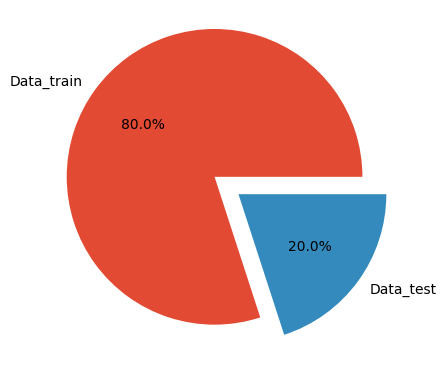

In [123]:
from sklearn.model_selection import train_test_split
Data_train , Data_test = train_test_split(df, test_size=0.2, random_state=0)
#chek if train_size==1-0.2 of all rows
plt.pie((Data_train.shape[0],Data_test.shape[0]), labels=('Data_train', 'Data_test'), autopct='%1.1f%%', explode =(0.2,0))

In [124]:
from sklearn.preprocessing import StandardScaler
def prep(data):
    # only for column object use it
    data = encodage(data) 
    # alwayse use it
    X = data.drop('Rating',axis=1)
    y = data['Rating']
    return X,y
X_train, y_train = prep(Data_train)
X_test, y_test = prep(Data_test)

dict_keys(['Branch'])
classed found :  ['A', 'B', 'C']
Updates dataframe is : 
      Branch       City Customer type  Gender         Product line  Unit price  \
687       0     Yangon        Member    Male   Home and lifestyle       63.56   
500       1   Mandalay        Member    Male    Sports and travel       73.97   
332       0     Yangon        Normal    Male  Fashion accessories       77.02   
979       1   Mandalay        Normal  Female   Food and beverages       67.77   
817       0     Yangon        Normal    Male   Food and beverages       33.88   
..      ...        ...           ...     ...                  ...         ...   
835       0     Yangon        Normal    Male  Fashion accessories       52.38   
192       2  Naypyitaw        Normal  Female   Food and beverages       87.80   
629       0     Yangon        Normal  Female  Fashion accessories       12.09   
559       0     Yangon        Member  Female   Home and lifestyle       72.42   
684       1   Mandalay       

# [Step 7: Model Building (If Applicable):]()<a id="8"></a> <br>

- Train the model

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [126]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

-0.031973118577848236


accuracy_score :  -0.031973118577848236
MAE :  1.5555850078975881
MSE :  3.199712890060588
RMSE :  1.788774130532021
MAE2 :  1.5283462556773908


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_12204\914855621.py:30: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Rating', ylabel='Density'>

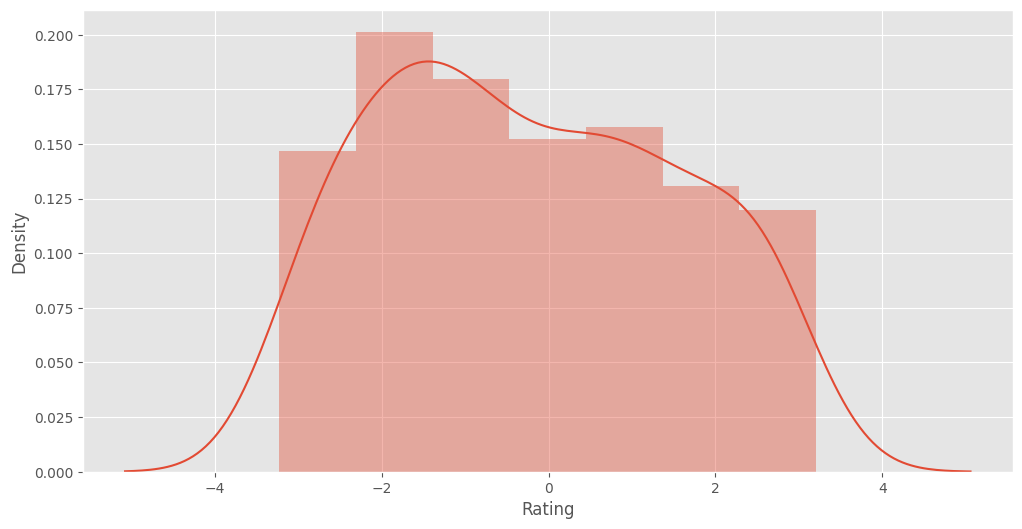

In [127]:
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,median_absolute_error

def scoring(y_test,y_pred):
    # Coefficient of Determination : R2= -((y-y_pred)**2/(y-y_mean)**2)   #this model describe in % the variation of y
    acc=score

    # Metrics.mean_absolute_error : 1/m(y-y_pred)  #is to detecte the big & catastrophic linéaire Error 
    MAE = mean_absolute_error(y_test,y_pred)           

    # Metrics.mean_squared_error: 1/m(y-y_pred)**2  #is to detecte the big & catastrophic exponentiell Error 
    MSE = mean_squared_error(y_test,y_pred)

    # Metrics.root.mean_squared_error: sqrt(1/m(y-y_pred)**2)  #is to detecte the big & catastrophic exponentiell Error 
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

    # Metrics.median_absolute_error : Median(y-y_pred)  #used to elimine aberant values
    MAE2 = median_absolute_error(y_test,y_pred)          

    return acc,MAE,MSE,RMSE,MAE2

#compare (accuracy acc, MAS,MSE,MAE)
scoring(y_test,y_pred)      
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("MAE : ",  scoring(y_test,y_pred)[1] )
print("MSE : " , scoring(y_test,y_pred)[2] )
print("RMSE : " , scoring(y_test,y_pred)[3] )
print("MAE2 : " , scoring(y_test,y_pred)[4] )
# Performance of model : #visuel how many ele have errors & if it's normal statistiq
plt.figure(figsize = (12,6))
sns.distplot(y_test - y_pred)    

# [Step 9: Make Pipline:]()<a id="10"></a> <br>

In [129]:
def prep2(data):
    # alwayse use it
    X = data.drop('Rating',axis=1)
    y = data['Rating']
    return X,y
X_train, y_train = prep2(Data_train)
X_test, y_test = prep2(Data_test)

In [131]:
from sklearn.preprocessing import PolynomialFeatures,RobustScaler, StandardScaler,OneHotEncoder
#MinMaxScaler,[Normalizer(copy=True, norm=''l1'or'max'')modif suivant row,MaxAbsScaler(copy=True)modif suivant columns,FunctionTransformer(func=fun1 or lambda x: x**0.1,validate = True),Binarizer(threshold = 1.0),
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, make_union

# Use of all models in order to eliminate overfitting => RadForst, AdBoost, SVM, KNN 
num_features = [col for col in df.select_dtypes(exclude=['object']) if col != 'Rating']
categ_features = [col for col in df.select_dtypes(include=['object']) if col != 'Rating']
#Eliminate nan val+StandardScaler
num_pipeline_norm = make_pipeline(KNNImputer(),RobustScaler())
#pas besoin de normalisation (RobustScaler()) (SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=-9)
num_pipeline = make_pipeline(KNNImputer())
# strategy = 'most_frequent',mean,median,constant with fill_value=-99
categ_pipeline = make_pipeline(KNNImputer(),OneHotEncoder())

preprocessor_norm = make_column_transformer((num_pipeline_norm,num_features),(categ_pipeline,categ_features))
preprocessor = make_column_transformer((num_pipeline,num_features),(categ_pipeline,categ_features))
#Model Regressor#===================================#=========================================
import xgboost as xgb
mod_XGB = make_pipeline(preprocessor_norm,PolynomialFeatures(),xgb.XGBRegressor())
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
mod_LG = make_pipeline(preprocessor_norm,PolynomialFeatures(),LinearRegression())
mod_Ridge = make_pipeline(preprocessor_norm,PolynomialFeatures(),Ridge(alpha=1.0,random_state=33))
mod_Lasso = make_pipeline(preprocessor_norm,PolynomialFeatures(),Lasso(alpha=1.0,random_state=33))
mod_SGDR = make_pipeline(preprocessor_norm,PolynomialFeatures(),SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber') )
from sklearn.svm import SVR
mod_SVR = make_pipeline(preprocessor_norm,PolynomialFeatures(),SVR())
from sklearn.tree import DecisionTreeRegressor
mod_tree = make_pipeline(preprocessor_norm,PolynomialFeatures(),DecisionTreeRegressor( max_depth=3,random_state=33))
from sklearn.neighbors import KNeighborsRegressor
mod_KNeighbor = make_pipeline(preprocessor_norm,PolynomialFeatures(),KNeighborsRegressor(n_neighbors = 5))
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
mod_Forest = make_pipeline(preprocessor_norm,PolynomialFeatures(),RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33))
mod_Gradient = make_pipeline(preprocessor_norm,PolynomialFeatures(),GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33))

models = {'XGB':mod_XGB,'LinearRegression':mod_LG,'Ridge':mod_Ridge,'Lasso':mod_Lasso,'SGDRegressor':mod_SGDR,'SVR':mod_SVR,
    'DecisionTreeRegressor':mod_tree,'KNeighborsRegressor':mod_KNeighbor,'RandomForestRegressor':mod_Forest,'GradientBoostingRegressor':mod_Gradient}
#Fitting Regressor#=================================#=========================================
accuracy_dict = {}
for nam, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Store accuracy in dictionary
    accuracy_dict[nam] = scoring(y_test, y_pred)[0]
    print('Result of model', nam)
    print("Accuracy Score: ", scoring(y_test, y_pred)[0])
    print("MAE: ", scoring(y_test, y_pred)[1])
    print("MSE: ", scoring(y_test, y_pred)[2])
    print("RMSE: ", scoring(y_test, y_pred)[3])
    print("MAE2: ", scoring(y_test, y_pred)[4])
# Find the model with the best accuracy
best_model = max(accuracy_dict, key=accuracy_dict.get)
print(f"The best model is {best_model} with an accuracy of {accuracy_dict[best_model]}")

Result of model XGB
Accuracy Score:  -0.031973118577848236
MAE:  1.6938196566104886
MSE:  4.1212653354946545
RMSE:  2.0300899821177025
MAE2:  1.5149447441101072
Result of model LinearRegression
Accuracy Score:  -0.031973118577848236
MAE:  1.643953125
MSE:  3.6637119873046875
RMSE:  1.9140825445379015
MAE2:  1.5828125000000002
Result of model Ridge
Accuracy Score:  -0.031973118577848236
MAE:  1.6218216738259463
MSE:  3.4817449290660547
RMSE:  1.8659434420866177
MAE2:  1.622281569424774
Result of model Lasso
Accuracy Score:  -0.031973118577848236
MAE:  1.5494799999999997
MSE:  3.15188
RMSE:  1.775353485928929
MAE2:  1.4820000000000002
Result of model SGDRegressor
Accuracy Score:  -0.031973118577848236
MAE:  1.700360956329875
MSE:  4.462369726653625
RMSE:  2.1124321827347794
MAE2:  1.446592426000744
Result of model SVR
Accuracy Score:  -0.031973118577848236
MAE:  1.5957578001531878
MSE:  3.428673268728022
RMSE:  1.8516676993262107
MAE2:  1.5948068283106611
Result of model DecisionTreeRegr

In [132]:
# Optimisation(hyperparametres) GridSearch :#=============================#========================
from sklearn.model_selection import GridSearchCV #or RandomizedSearchCV
hyper_params = {'polynomialfeatures__degree': [1e-3,1e-4]}          
grid = GridSearchCV(mod_XGB, hyper_params,cv=4).fit(X_train,y_train)    #cv=3ou4ou5 == ndr of split
# grid = RandomizedSearchCV(mod_SVM, hyper_params, scoring='recall',cv=4, n_iter=40).fit(X_train,y_train)   #n_iter == 40 iteration by chance
print(grid.best_score_)                      #get best score in GridSearchCV
print(grid.best_params_)                     #get best parametres
model_grid = grid.best_estimator_            #get best model
# 'Fit :
model_grid.fit(X_train,y_train)
y_pred = model_grid.predict(X_test)
# 'Classification_report:
scoring(y_test,y_pred)                           #compare (accuracy acc, score f1, cm)

ValueError: 
All the 8 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'degree' parameter of PolynomialFeatures must be an int in the range [0, inf) or an array-like. Got 0.001 instead.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 919, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'degree' parameter of PolynomialFeatures must be an int in the range [0, inf) or an array-like. Got 0.0001 instead.


In [87]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Payment', 'gross income', 'Rating'],
      dtype='object')

## **Data Visualisation**

**Below graph shows count of females and males is almost same** 